In [1]:
import pandas as pd
import altair as alt
import numpy as np
import datetime
from collections import defaultdict
import seaborn as sns

In [2]:
ina = pd.read_csv(
    "Data/ina-barometre-jt-tv-donnees-quotidiennes-2000-2020-nbre-sujets-durees-202410.csv",
    encoding="utf-8",
    sep=";",
)


In [5]:
ina['Theme'] = ina['Theme'].replace({
    'Soci�t�': 'Société',
    'Sant�': 'Santé',
})

In [6]:
ina["Theme"].unique()

array(['Catastrophes', 'Culture-loisirs', 'Environnement',
       'International', 'Société', 'Sport', 'Economie', 'Education',
       'Politique France', 'Santé', 'Histoire-hommages', 'Justice',
       'Faits divers', 'Sciences et techniques'], dtype=object)

In [7]:
ina.sort_values(by="Date", inplace=True)

In [8]:
ina["Date"] = pd.to_datetime(ina["Date"], format="%d/%m/%Y")

In [9]:
sub_ina =  ina[(ina["Theme"]=="International")]

In [10]:
sub_ina.sort_values(by="Date", ascending=True, inplace=True)

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\2491141983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_ina.sort_values(by="Date", ascending=True, inplace=True)


In [11]:
sub_ina['Year'] = sub_ina['Date'].dt.year

sub_ina_theme = sub_ina.groupby(['Year', "Chaine"]).agg({'Nb Mots clefs':'sum'}).reset_index()

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\3035232928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_ina['Year'] = sub_ina['Date'].dt.year


In [12]:
chart = alt.Chart(sub_ina_theme).mark_point(opacity=1,color="white").encode(
    x=alt.X('Year:O', title='Année'), 
    color=alt.Color('Chaine', legend=None),
)

line = chart.mark_line().encode(
    y = alt.Y('mean(Nb Mots clefs):Q', title='Nombre de mots clés')
)

courbe = chart.mark_circle().encode(
    alt.X("last_date['Year']:O"),
    alt.Y("last_date['Nb Mots clefs']:Q")
).transform_aggregate(
    last_date="argmax(Year)",
    groupby=["Chaine"]
)

Chaine = courbe.mark_text(align="left", dx=4).encode(text="Chaine")

point_chart = alt.Chart(sub_ina_theme).mark_point(size=50, filled=True).encode(
    x=alt.X('Year:O'),
    y=alt.Y('Nb Mots clefs:Q'),
    color='Chaine',
    tooltip=['Year', 'Nb Mots clefs']
)

alt.theme.enable('carbong100')

chart = (line + Chaine + point_chart).properties(
    width=1000,
    height=500,
    title="Intensité de l'utilisation de mots clefs relié au lexique de la catastrophe par chaîne par année"
).interactive()

chart


alt.LayerChart(...)

In [13]:
sub_ina =  ina[(ina["Chaine"]=="France 2")]
sub_ina['Year'] = sub_ina['Date'].dt.year

sub_ina.sort_values(by="Date", ascending=True, inplace=True)
sub_ina_chaine = sub_ina.groupby(['Year', "Theme"]).agg({'Nb Mots clefs':'sum'}).reset_index()

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\73963243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_ina['Year'] = sub_ina['Date'].dt.year
C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\73963243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_ina.sort_values(by="Date", ascending=True, inplace=True)


In [14]:
import altair as alt

chart = alt.Chart(sub_ina_chaine).mark_point(opacity=1,color="white").encode(
    x=alt.X('Year:O', title='Année'), 
    color=alt.Color('Theme', legend=None),
)

line = chart.mark_line().encode(
    y = alt.Y('mean(Nb Mots clefs):Q', title='Nombre de mots clés')
)

courbe = chart.mark_circle().encode(
    alt.X("last_date['Year']:O"),
    alt.Y("last_date['Nb Mots clefs']:Q")
).transform_aggregate(
    last_date="argmax(Year)",
    groupby=["Theme"]
)

Theme = courbe.mark_text(align="left", dx=4).encode(text="Theme")

point_chart = alt.Chart(sub_ina_chaine).mark_point(size=50, filled=True).encode(
    x=alt.X('Year:O'),
    y=alt.Y('Nb Mots clefs:Q'),
    color='Theme',
    tooltip=['Year', 'Nb Mots clefs']
)

alt.theme.enable('carbong100')

chart = (line + Theme + point_chart).properties(
    width=1000,
    height=500,
    title="Intensité de l'utilisation de mots clefs relié au lexique de la catastrophe par chaîne par année"
).interactive()

chart

alt.LayerChart(...)

In [15]:
fig_long = px.scatter(sub_ina_agg, x= 'Year', y = 'Nb Mots clefs', trendline='lowess', color="Chaine", title="Intensité des sujets sur les catastrophes par an et par chaine",)
fig_long.update_traces(opacity=0, selector=dict(mode='markers'))
fig_long.update_traces(showlegend=True, selector=dict(mode='lines'))

fig_long.show()

NameError: name 'px' is not defined

----------

In [3]:
arcom = pd.read_excel("Data/les-francais-et-l-information-arcom-2024-base-anonymisee.xlsx")

In [4]:
def var_selection(var_obj):
    if var_obj == "Sexe":
        liste_obj = arcom["RS1_R"].value_counts().keys().tolist()
        cols_data = ["Homme", "Femme"]
        var = "RS1_R"
        title = "Préférences des répondants par sexe"
    if var_obj == "Tranche d'âge":
        liste_obj = arcom["RS2C_RECODE_AG_R"].value_counts().keys().tolist()
        cols_data = [
            "15-17 ans",
            "18-24 ans",
            "25-34 ans",
            "35-44 ans",
            "45-59 ans",
            "60-69 ans",
            "70 ans et plus",
        ]
        var = "RS2C_RECODE_AG_R"
        title = "Préférences des répondants par tranche d'âge"
    elif var_obj == "Catégorie socio-professionnelle":
        liste_obj = arcom["RS4_R"].value_counts().keys().tolist()
        cols_data = [
            "Agriculteur",
            "Artisan/Commercant",
            "Cadre/Profession libérale",
            "Profession intermédiaire",
            "Employé",
            "Ouvrier",
            "Je ne sais pas/Je ne réponds pas",
        ]
        var = "RS4_R"
        title = "Préférences des répondants par catégorie socio-professionnelle"
    elif var_obj == "Niveau d'étude":
        liste_obj = arcom["RS5_R"].value_counts().keys().tolist()
        cols_data = [
            "Niveau Primaire",
            "Secondaire 6°-3°",
            "Secondaire 2nd-terminale",
            "Technique court(CAP,BEP,...)",
            "Baccalauréat",
            "Technique supérieur",
            "Supérieur 1er Cycle",
            "Supérieur 2nd Cycle",
            "Doctorat",
        ]
        var = "RS5_R"
        title = "Préférences des répondants par niveau d'étude"
    elif var_obj == "Revenu":
        liste_obj = arcom["RS14_R"].value_counts().keys().tolist()
        cols_data = [
            "Moins de 1500 net",
            "Entre 1500 et 3000 net",
            "Entre 3000 et 4500",
            "Entre 4500 et 7500",
            "7500 et plus",
            "Ne souhaite pas répondre",
        ]
        var = "RS14_R"
        title = "Préférences des répondants par niveau de revenu"
    liste_obj.sort()
    return liste_obj, cols_data, var, title

In [5]:
arcom[arcom.filter(regex=r"INF3_R1_(\d)").columns]

,INF3_R1_1,INF3_R1_2,INF3_R1_3,INF3_R1_4,INF3_R1_5,INF3_R1_6,INF3_R1_7,INF3_R1_8,INF3_R1_9,INF3_R1_10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,6.0,7.0,9.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3341,2.0,4.0,5.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN
3342,1.0,2.0,3.0,4.0,5.0,7.0,9.0,NaN,NaN,NaN
3343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3344,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
arcom[arcom.filter(regex=r"RSINFO_1_LR_R_(\d)").columns]

,RSINFO_1_LR_R_1,RSINFO_1_LR_R_2,RSINFO_1_LR_R_3,RSINFO_1_LR_R_4,RSINFO_1_LR_R_5,RSINFO_1_LR_R_6,RSINFO_1_LR_R_7,RSINFO_1_LR_R_8,RSINFO_1_LR_R_9,RSINFO_1_LR_R_10,RSINFO_1_LR_R_11,RSINFO_1_LR_R_12,RSINFO_1_LR_R_13,RSINFO_1_LR_R_14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,1.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,13.0,NaN,NaN,NaN,NaN,NaN
3342,1.0,2.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3343,1.0,2.0,5.0,6.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3344,1.0,2.0,4.0,7.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
arcom.groupby(var).apply(
    lambda g: g.filter(regex=r"RSINFO_2_LR_R_(\d)").apply(lambda x: x.value_counts())
).fillna(0)

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\2531636858.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  arcom.groupby(var).apply(


RSINFO_2_LR_R_1  RSINFO_2_LR_R_2  RSINFO_2_LR_R_3  \
RS2C_RECODE_AG_R                                                          
1                1.0               23               42               19   
                 2.0               28               31                7   
2                1.0              117              172               87   
                 2.0               58               62               18   
3                1.0              260              170               98   
                 2.0               93              112               16   
4                1.0              285              144               72   
                 2.0              156              155               34   
5                1.0              358              148              104   
                 2.0              312              235               46   
6                1.0              152               61               47   
                 2.0              207               91               13   
7                1.0               98               21               20   
                 2.0              149               57               13   

                      RSINFO_2_LR_R_4  RSINFO_2_LR_R_5  RSINFO_2_LR_R_6  \
RS2C_RECODE_AG_R                                                          
1                1.0               40               19                8   
                 2.0               26               50                8   
2                1.0              114               71               54   
                 2.0               48              106               41   
3                1.0               94               81              101   
                 2.0               75              129               61   
4                1.0               74               73               85   
                 2.0               72              136               96   
5                1.0               91               55              103   
                 2.0              104              171              142   
6                1.0               23               19               29   
                 2.0               28               55               59   
7                1.0               11                8               14   
                 2.0                4               24               40   

                      RSINFO_2_LR_R_7  RSINFO_2_LR_R_8  RSINFO_2_LR_R_9  \
RS2C_RECODE_AG_R                                                          
1                1.0               12                9               54   
                 2.0               61                2               28   
2                1.0               56               36              172   
                 2.0              126               32               59   
3                1.0               68               55              237   
                 2.0              240               36              116   
4                1.0               75               46              203   
                 2.0              296               36              192   
5                1.0               91               35              328   
                 2.0              508               37              331   
6                1.0               53               14              165   
                 2.0              281               20              153   
7                1.0               30                3              102   
                 2.0              207                9              101   

                      RSINFO_2_LR_R_10  RSINFO_2_LR_R_11  RSINFO_2_LR_R_12  \
RS2C_RECODE_AG_R                                                             
1                1.0               6.0                12              11.0   
                 2.0               4.0                18              11.0   
2                1.0              25.0                35              49.0   
                 2.0         

In [327]:
df_age = pd.DataFrame(data=[[36,25,16,9,4],[36,25,16,9,4]], 
                      index=['age_m', 'age_f'],
                      columns=['0-15', '15-30', '30-45', '45-60', '60+']).T.reset_index()

chart_m = alt.Chart(df_age).mark_bar().encode(
    x=alt.X('age_m:Q',
            title='Male',
            sort='descending',
            scale=alt.Scale(domain=(0,40))),
    y=alt.Y('index:N', axis=alt.Axis(title='Age Groups'), sort='descending'),
    color=alt.Color('age_m')
)

chart_f = alt.Chart(df_age).mark_bar().encode(
    x=alt.X('age_f:Q',
            title='Femle',
            sort='ascending',
            scale=alt.Scale(domain=(0,40))),
    y=alt.Y('index:N', axis=None, sort='descending'),
    color=alt.Color('age_m')
)

chart_m | chart_f

alt.HConcatChart(...)

In [324]:
def Graphe_RS(arcom, var_obj):

    _, cols_data, var, _ = var_selection(var_obj)

    sub_df = arcom.groupby(var).apply(
        lambda g: g.filter(regex=r"RSINFO_2_LR_R_(\d)").apply(lambda x: x.value_counts())
    ).fillna(0)

    sub_df.reset_index(inplace=True)
    sub_df["Ref"] = sub_df[f"{var}"].replace(dict(zip(sorted(sub_df[f"{var}"].unique()), cols_data)))

    col = [
        "Facebook",
        "Instagram",
        "X",
        "TikTok",
        "Snapchat",
        "LinkedIn",
        "WhatsApp",
        "Telegram",
        "Youtube",
        "Twitch",
        "Reddit",
        "Discord",
        "Autre réseau"
    ]

    df_long = sub_df.melt(id_vars=[var, "level_1","Ref"], var_name="Variable", value_name="Réponses")

    df_long["Variable"] = df_long["Variable"].replace(dict(zip(df_long["Variable"].unique(), col)))

    df_long["level_1"] = df_long["level_1"].astype(int)   

    sorted_df = df_long[df_long["level_1"] == 2].sort_values(by=["Ref", "Réponses"], ascending=[True, False]).groupby("Ref").head(5)

    Chart =alt.Chart(sorted_df).mark_bar().encode(
        x=alt.X("Ref:N", title=None),
        y=alt.Y("Réponses:Q", title=None),
        xOffset="Variable",
        color=alt.Color("Variable", title="Réseau"),
        tooltip=["Ref", "Variable", "Réponses"]
    ).configure_view(
        fill=None,
        stroke=None
    ).properties(
        height=400,
        width=800,
        title={"text" : f"Nombres d'utilisation des réseaux sociaux par {var_obj}",
            "subtitle": f"Source ARCOM 2024, base : 2949 répondants",
            "subtitleColor": "white",}
    )

    return Chart

Graphe_RS(arcom, var_obj)

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\1590899262.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_df = arcom.groupby(var).apply(


alt.Chart(...)

In [378]:
import altair as alt
import pandas as pd

def Graphe_RS(arcom, var_obj):
    _, cols_data, var, _ = var_selection(var_obj)

    sub_df = arcom.groupby(var).apply(
        lambda g: g.filter(regex=r"RSINFO_2_LR_R_(\d)").apply(lambda x: x.value_counts())
    ).fillna(0)

    sub_df.reset_index(inplace=True)
    sub_df["Ref"] = sub_df[f"{var}"].replace(dict(zip(sorted(sub_df[f"{var}"].unique()), cols_data)))

    col = [
        "Facebook", "Instagram", "X", "TikTok", "Snapchat", "LinkedIn",
        "WhatsApp", "Telegram", "Youtube", "Twitch", "Reddit", "Discord", "Autre réseau"
    ]

    df_long = sub_df.melt(id_vars=[var, "level_1", "Ref"], var_name="Variable", value_name="Réponses")
    df_long["Variable"] = df_long["Variable"].replace(dict(zip(df_long["Variable"].unique(), col)))

    df_long["level_1"] = df_long["level_1"].astype(int)

    sorted_df_2 = df_long[df_long["level_1"] == 2].sort_values(by=["Ref", "Réponses"], ascending=[True, False]).groupby("Ref").head(5)

    sorted_df_1 = df_long[df_long["level_1"] == 1].merge(
        sorted_df_2[["Ref", "Variable"]], on=["Ref", "Variable"], how="inner"
    )

    sorted_df_1["Réponses Positives"] = sorted_df_1["Réponses"] 
    sorted_df_1["Réponses"] = sorted_df_1["Réponses"].abs()  

    sorted_df_1["level_1"] = sorted_df_1["level_1"].replace({1: "Non"})
    sorted_df_2["level_1"] = sorted_df_2["level_1"].replace({2: "Oui"})

    sorted_df_1.rename(columns={"level_1": "Utilisation"}, inplace=True)
    sorted_df_2.rename(columns={"level_1": "Utilisation"}, inplace=True)


    # y_max_1 = sorted_df_1["Réponses"].max()+100
    y_max_2 = sorted_df_2["Réponses"].max()+100

    chart_top = alt.Chart(sorted_df_2).mark_bar().encode(
        x=alt.X("Ref:N", title=None, axis=alt.Axis(labelFontSize=14)),
        y=alt.Y("Réponses:Q", title=None, scale=alt.Scale(domain=[0, y_max_2])),
        xOffset="Variable",
        color=alt.Color("Variable", title="Réseau"),
        tooltip=[
            alt.Tooltip("Ref:N", title="Catégorie"),
            alt.Tooltip("Utilisation:N"),
            alt.Tooltip("Variable:N", title="Réseau Social"),
            alt.Tooltip("Réponses:Q", title="Nombre d'utilisations")
        ]
    )

    chart_bottom = alt.Chart(sorted_df_1).mark_bar().encode(
        x=alt.X("Ref:N", title=None, axis=alt.Axis(ticks=False,labels=False)), 
        y=alt.Y("Réponses:Q", title=None, scale=alt.Scale(domain=[y_max_2, 0])),  
        xOffset="Variable",
        color=alt.Color("Variable", title="Réseau"),
        tooltip=[
            alt.Tooltip("Ref:N", title="Catégorie"),
            alt.Tooltip("Utilisation:N"),
            alt.Tooltip("Variable:N", title="Réseau Social"),
            alt.Tooltip("Réponses Positives:Q", title="Nombre d'utilisations")
        ]
    ).properties(
        height=400
    )

    final_chart = chart_top & chart_bottom

    return final_chart

var_obj = "Tranche d'âge"
Graphe_RS(arcom, var_obj)


C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\285312132.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_df = arcom.groupby(var).apply(


alt.VConcatChart(...)

In [241]:
arcom.groupby(var).apply(
    lambda g: g.filter(regex=r"RSINFO_1_LR(\.)").apply(lambda x: x.value_counts(normalize=True))
).fillna(0)

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\3862999529.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  arcom.groupby(var).apply(


Empty DataFrame
Columns: []
Index: [(1, 393), (1, 447), (1, 484), (1, 493), (1, 587), (1, 648), (1, 690), (1, 718), (1, 764), (1, 782), (1, 825), (1, 878), (1, 916), (1, 921), (1, 940), (1, 942), (1, 981), (1, 989), (1, 992), (1, 1009), (1, 1024), (1, 1058), (1, 1070), (1, 1126), (1, 1153), (1, 1221), (1, 1222), (1, 1256), (1, 1259), (1, 1272), (1, 1277), (1, 1286), (1, 1301), (1, 1315), (1, 1332), (1, 1349), (1, 1406), (1, 1411), (1, 1456), (1, 1472), (1, 1518), (1, 1521), (1, 1697), (1, 1700), (1, 1701), (1, 1710), (1, 1719), (1, 1730), (1, 1733), (1, 1754), (1, 1767), (1, 1829), (1, 1845), (1, 1859), (1, 1865), (1, 1877), (1, 1912), (1, 1929), (1, 1930), (1, 1946), (1, 1958), (1, 1983), (1, 1988), (1, 1993), (1, 2002), (1, 2048), (1, 2067), (1, 2096), (1, 2115), (1, 2142), (1, 2151), (1, 2210), (1, 2248), (1, 2258), (1, 2270), (1, 2491), (1, 2514), (1, 2518), (1, 2526), (1, 2538), (1, 2542), (1, 2554), (1, 2591), (1, 2592), (1, 2597), (1, 2604), (1, 2608), (1, 2645), (1, 2672), (1, 2693), (1, 2701), (1, 2702), (1, 2740), (1, 2752), (1, 2754), (1, 2756), (1, 2766), (1, 2807), (1, 2848), (1, 2898), ...]

[3346 rows x 0 columns]

In [ ]:

cols_conf = arcom.filter(regex=r"INF3_R1_(\d)").columns

liste_obj, cols_data, var, title = var_selection(var_obj)

title += " en la confiance accordée aux sources d'information"

columns_conf = defaultdict(dict)

for item, ref in zip(liste_obj, cols_data):
    for col in cols_conf:
        columns_conf[ref][col] = {
            "Journalistes": (arcom[(arcom[var] == item)][col] == 1).sum(),
            "Experts Invités": (arcom[(arcom[var] == item)][col] == 2).sum(),
            "Perso° Politiques GVT": (arcom[(arcom[var] == item)][col] == 3).sum(),
            "Autres Perso° Politiques": (arcom[(arcom[var] == item)][col] == 4).sum(),
            "Célébrités": (arcom[(arcom[var] == item)][col] == 5).sum(),
            "Créateurs Contenu": (arcom[(arcom[var] == item)][col] == 6).sum(),
            "Associations/ACDT": (arcom[(arcom[var] == item)][col] == 7).sum(),
            "Anonymes": (arcom[(arcom[var] == item)][col] == 8).sum(),
            "Proches": (arcom[(arcom[var] == item)][col] == 9).sum(),
        }

rows = []
for ref, motiv_data in columns_conf.items():
    sum_motivations = {}  
    total_sum = 0  

    for _, motivations in motiv_data.items():
        for motivation, value in motivations.items():
            sum_motivations[motivation] = sum_motivations.get(motivation, 0) + value
            total_sum += value  

    for motivation, total in sum_motivations.items():
        if total_sum > 0:
            valeur_norm = total / total_sum  
        else:
            valeur_norm = 0  
        rows.append({"ref": ref, "Source": motivation, "Valeur": round(valeur_norm,3)})

df = pd.DataFrame(rows)

chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('ref:N', title=""),
    y=alt.Y('Valeur:Q', title="", stack="normalize"),
    color=alt.Color('Source:N', title="Source"),
    tooltip=['ref', 'Source', 'Valeur']
).configure_view(
    fill=None, 
    stroke=None
).properties(
    title={
        "text": title,
        "subtitle": "Source : Arcom 2024, base : 3356 répondants",
        "subtitleColor": "white",
    },
    width=700,
    height=400
)


In [11]:
def Graphe_inf_fiable(arcom, var_obj):
    liste_obj, cols_data, var, title = var_selection(var_obj)

    title += " sur ce qu'ils considèrent comme une information fiable"

    liste_obj.sort()
    cols_fiable = arcom.filter(regex=r"INFOFIABLEDEF_R_(\d)").columns

    count = defaultdict(dict)

    for item, ref in zip(liste_obj, cols_data):
        for col in cols_fiable:
            count[ref][col] = {
                "Je connais l'auteur": (arcom[(arcom[var] == item)][col] == 1).sum(),
                "Elle est énoncée par un journaliste": (
                    arcom[(arcom[var] == item)][col] == 2
                ).sum(),
                "Elle vient d'un média très connu": (
                    arcom[(arcom[var] == item)][col] == 3
                ).sum(),
                "Elle est claire et détaillée": (
                    arcom[(arcom[var] == item)][col] == 4
                ).sum(),
                "Elle confirme mes opinions": (
                    arcom[(arcom[var] == item)][col] == 5
                ).sum(),
                "Elle vient d'un média indépendant": (
                    arcom[(arcom[var] == item)][col] == 6
                ).sum(),
                "Je vois qu'elle est reprise par un grand nombre de médias": (
                    arcom[(arcom[var] == item)][col] == 7
                ).sum(),
                "Je vois que l'information est récente": (
                    arcom[(arcom[var] == item)][col] == 8
                ).sum(),
                "Je peux vérifier facilement la source": (
                    arcom[(arcom[var] == item)][col] == 9
                ).sum(),
                "Je ne relève pas d'incohérences évidentes": (
                    arcom[(arcom[var] == item)][col] == 10
                ).sum(),
                "Mes proches m'en parlent": (
                    arcom[(arcom[var] == item)][col] == 11
                ).sum(),
                "Elle repose sur des preuves scientifiques": (
                    arcom[(arcom[var] == item)][col] == 12
                ).sum(),
                "Elle est accompagnée d'une vidéo montrant les événements sans filtre": (
                    arcom[(arcom[var] == item)][col] == 13
                ).sum(),
                "Je ne me soucie pas trop de la fiabilité des informations": (
                    arcom[(arcom[var] == item)][col] == 14
                ).sum(),
            }

    rows = []
    for ref, motiv_data in count.items():
        sum_motivations = {}
        total_sum = 0

        for _, motivations in motiv_data.items():
            for motivation, value in motivations.items():
                sum_motivations[motivation] = sum_motivations.get(motivation, 0) + value
                total_sum += value

        for motivation, total in sum_motivations.items():
            if total_sum > 0:
                valeur_norm = total / total_sum
            else:
                valeur_norm = 0
            rows.append(
                {"ref": ref, "Motivation": motivation, "Valeur": round(valeur_norm, 3)}
            )

    df = pd.DataFrame(rows)

    print(df)

    chart = (
        alt.Chart(df)
        .mark_rect()
        .encode(
            x=alt.X("ref:O", title=" "),
            y=alt.Y("Motivation:N", title=" ", axis=alt.Axis(labelLimit=250), sort=alt.EncodingSortField(field="Valeur", order="descending")),
            color=alt.Color(
                "Valeur:Q",
                scale=alt.Scale(scheme="spectral"),
                legend=alt.Legend(labelLimit=0),
            ),
            tooltip=["ref", "Motivation", "Valeur"],
        )
        .configure_view(fill=None, stroke=None)
        .properties(
            title={
                "text": title,
                "subtitle": "Source : Arcom 2024, base : 3356 répondants",
                "subtitleColor": "white",
            },
            width=700,
            height=375,
        )
    )

    return chart

var_obj = "Tranche d'âge"
Graphe_inf_fiable(arcom, var_obj)

               ref                                         Motivation  Valeur
0        15-17 ans                                Je connais l'auteur   0.026
1        15-17 ans                Elle est énoncée par un journaliste   0.051
2        15-17 ans                   Elle vient d'un média très connu   0.066
3        15-17 ans                       Elle est claire et détaillée   0.146
4        15-17 ans                         Elle confirme mes opinions   0.011
..             ...                                                ...     ...
93  70 ans et plus          Je ne relève pas d'incohérences évidentes   0.091
94  70 ans et plus                           Mes proches m'en parlent   0.025
95  70 ans et plus          Elle repose sur des preuves scientifiques   0.137
96  70 ans et plus  Elle est accompagnée d'une vidéo montrant les ...   0.082
97  70 ans et plus  Je ne me soucie pas trop de la fiabilité des i...   0.008

[98 rows x 3 columns]


alt.Chart(...)

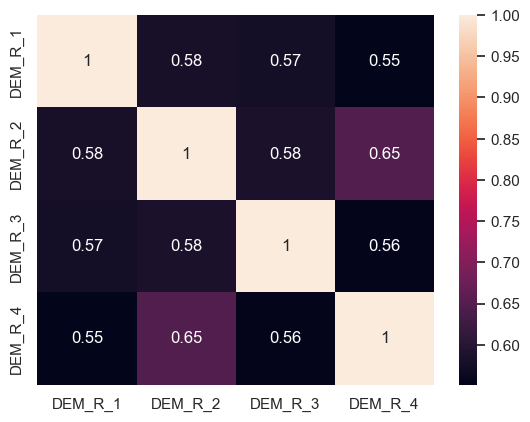

In [ ]:
var_obj = "Sexe"

liste_obj, cols_data, var, title = var_selection(var_obj)

arcom.filter(regex=r"DEM_R_(\d+)").columns.tolist()

arcom[arcom.filter(regex=r"DEM_R_(\d+)").columns.tolist()].corr()

sns.heatmap(arcom[arcom.filter(regex=r"DEM_R_(\d+)").columns.tolist()].corr(), annot=True)

In [ ]:
from prince import PCA, MCA

data_dem = arcom.filter(regex=r"DEM_R_(\d+)").copy()

acm = MCA(n_components=2, check_input=True)

acm.fit(data_dem)

data_dem_tr = pd.concat([acm.transform(data_dem), arcom[var].apply(str)], axis=1)

data_dem_tr.columns = ["component 0", "component 1", var]

chart_1 = acm.plot(data_dem)

chart_2 = alt.Chart(data_dem_tr).mark_point().encode(
    x='component 0',
    y='component 1',
    color=var
).interactive()

chart_1

chart_2

alt.Chart(...)

In [47]:
data_dem_tr.groupby(var).agg({"component 0":"mean", "component 1":"mean"})

,component 0,component 1
RS1_R,,
1,-0.012401,0.105587
2,0.009955,-0.084766


<Axes: >

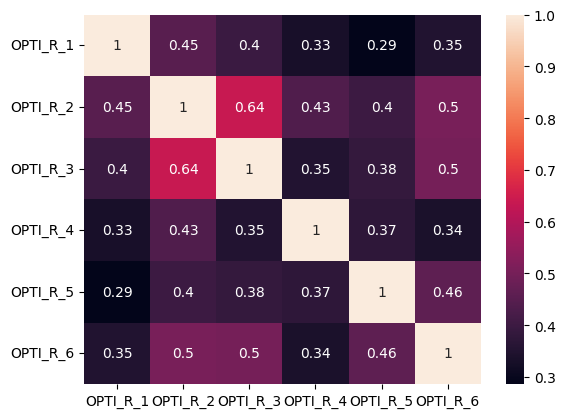

In [26]:
var_obj = "Sexe"

liste_obj, cols_data, var, title = var_selection(var_obj)

arcom.filter(regex=r"OPTI_R_(\d+)").columns.tolist()

arcom[arcom.filter(regex=r"OPTI_R_(\d+)").columns.tolist()].corr()

sns.heatmap(arcom[arcom.filter(regex=r"OPTI_R_(\d+)").columns.tolist()].corr(), annot=True)

In [49]:
from prince import PCA, MCA

data_dem = arcom.filter(regex=r"OPTI_R_(\d+)").copy().astype(str)

acm = MCA(n_components=2, check_input=True)

acm.fit(data_dem)

data_dem_tr = pd.concat([acm.transform(data_dem), arcom[var].apply(str)], axis=1)

data_dem_tr.columns = ["component 0", "component 1", var]

chart_1 = acm.plot(data_dem)

chart_2 = alt.Chart(data_dem_tr).mark_point().encode(
    x='component 0',
    y='component 1',
    color=var
).interactive()

chart_1

chart_2

alt.Chart(...)

In [170]:
arcom.groupby(var).apply(
    lambda g: g.filter(regex=r"ATTENTESJ_R_(\d+)").apply(lambda x: x.value_counts(normalize=True))
).fillna(0)

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\1499965385.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  arcom.groupby(var).apply(


ATTENTESJ_R_1  ATTENTESJ_R_2  ATTENTESJ_R_3  ATTENTESJ_R_4  \
RS14_R                                                                   
1      1.0       0.520988       0.822222       0.679012       0.666667   
       2.0       0.414815       0.138272       0.269136       0.288889   
       3.0       0.064198       0.039506       0.051852       0.044444   
2      1.0       0.514760       0.880996       0.708487       0.702030   
       2.0       0.427122       0.099631       0.256458       0.261070   
       3.0       0.058118       0.019373       0.035055       0.036900   
3      1.0       0.528278       0.902314       0.731362       0.709512   
       2.0       0.422879       0.077121       0.233933       0.258355   
       3.0       0.048843       0.020566       0.034704       0.032134   
4      1.0       0.546512       0.880814       0.726744       0.677326   
       2.0       0.412791       0.107558       0.258721       0.281977   
       3.0       0.040698       0.011628       0.014535       0.040698   
5      1.0       0.527273       0.909091       0.800000       0.763636   
       2.0       0.400000       0.072727       0.163636       0.200000   
       3.0       0.072727       0.018182       0.036364       0.036364   
6      1.0       0.519435       0.879859       0.692580       0.689046   
       2.0       0.441696       0.113074       0.279152       0.286219   
       3.0       0.038869       0.007067       0.028269       0.024735   

            ATTENTESJ_R_5  ATTENTESJ_R_6  ATTENTESJ_R_7  ATTENTESJ_R_8  \
RS14_R                                                                   
1      1.0       0.725926       0.725926       0.772840       0.358025   
       2.0       0.244444       0.239506       0.182716       0.454321   
       3.0       0.029630       0.034568       0.044444       0.187654   
2      1.0       0.744465       0.744465       0.836716       0.309041   
       2.0       0.224170       0.235240       0.140221       0.492620   
       3.0       0.031365       0.020295       0.023063       0.198339   
3      1.0       0.749357       0.768638       0.861183       0.314910   
       2.0       0.221080       0.204370       0.118252       0.421594   
       3.0       0.029563       0.026992       0.020566       0.263496   
4      1.0       0.680233       0.773256       0.828488       0.255814   
       2.0       0.305233       0.218023       0.145349       0.424419   
       3.0       0.014535       0.008721       0.026163       0.319767   
5      1.0       0.709091       0.800000       0.890909       0.181818   
       2.0       0.254545       0.200000       0.072727       0.527273   
       3.0       0.036364       0.000000       0.036364       0.290909   
6      1.0       0.724382       0.752650       0.830389       0.328622   
       2.0       0.250883       0.236749       0.148410       0.491166   
       3.0       0.024735       0.010601       0.021201       0.180212   

            ATTENTESJ_R_9  
RS14_R                     
1      1.0       0.562963  
       2.0       0.355556  
       3.0       0.081481  
2      1.0       0.554428  
       2.0       0.382841  
       3.0       0.062731  
3      1.0       0.568123  
       2.0       0.376607  
       3.0       0.055270  
4      1.0       0.566860  
       2.0       0.389535  
       3.0       0.043605  
5      1.0       0.654545  
       2.0       0.290909  
       3.0       0.054545  
6      1.0       0.547703  
       2.0       0.388693  
       3.0       0.063604

In [ ]:
["Sélectionner et hiérarchiser les informations les plus importantes"
"Fournir des informations fiables et vérifiées"
"Révéler les grands scandales politiques ou financiers"
"Rester neutres en toutes circonstances"
"Donner la parole à tout le monde y compris les minorités"
"Permettre que tous les points de vue s'expriment librement"
"Détecter les fausses nouvelles et lutter contre leur propagation"
"Apporter des solutions aux différents problèmes"
"Expliquer comment ils choisissent et fabriquent les informations"]

In [197]:
def Graphe_attentes(arcom, var_obj, level):

    liste_obj, cols_data, var, title = var_selection(var_obj)

    df= arcom.groupby(var).apply(
        lambda g: g.filter(regex=r"ATTENTESJ_R_(\d+)").apply(lambda x: x.value_counts(normalize=True))
    ).fillna(0)
    df.columns = ["ATTENTE 1", "ATTENTE 2", "ATTENTE 3","ATTENTE 4", "ATTENTE 5", "ATTENTE 6", "ATTENTE 7", "ATTENTE 8", "ATTENTE 9"]
    df.reset_index(inplace=True)
    df["level_1"] = df["level_1"].astype(int).astype(str)
    df["Ref"] = df[f"{var}"].replace(dict(zip(sorted(df[f"{var}"].unique()), cols_data)))

    attentes_columns = df.filter(regex=r"ATTENTE (\d+)").columns.tolist()

    df_long = df.melt(id_vars=["Ref", "level_1"], value_vars=attentes_columns,
                    var_name="Attente", value_name="% Réponses")

    Chart = alt.Chart(df_long[df_long["level_1"]==f"{level}"]).mark_rect().encode(
        x=alt.X('Ref:N', title=None),
        y=alt.Y('Attente:N', title=None),
        color=alt.Color('% Réponses:Q', scale=alt.Scale(scheme='spectral')),
        tooltip=['Attente', 'Ref', '% Réponses']
    ).properties(
        width=800,
        height=400,
        title={"text" : f"Classement des attentes des sondés par {var_obj}",
                "subtitle" : f"Source : ARCOM 2024, base 2949 répondants",
                "subtitleColor": "white",
               }
    ).interactive()

    return Chart

var_obj = "Revenu"

Graphe_attentes(arcom, var_obj, 1) 
Graphe_attentes(arcom, var_obj, 2)
Graphe_attentes(arcom, var_obj, 3)

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\390586070.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df= arcom.groupby(var).apply(
C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\390586070.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df= arcom.groupby(var).apply(
C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\390586070.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grou

alt.Chart(...)

In [224]:
liste_obj, cols_data, var, title = var_selection(var_obj)

df= arcom.groupby(var).apply(
    lambda g: g.filter(regex=r"ATTENTESJ_R_(\d+)").apply(lambda x: x.value_counts(normalize=True))
).fillna(0)
cols = ["Sélectionner et hiérarchiser les informations les plus importantes",
                "Fournir des informations fiables et vérifiées",
                "Révéler les grands scandales politiques ou financiers",
                "Rester neutres en toutes circonstances",
                "Donner la parole à tout le monde y compris les minorités",
                "Permettre que tous les points de vue s'expriment librement",
                "Détecter les fausses nouvelles et lutter contre leur propagation",
                "Apporter des solutions aux différents problèmes",
                "Expliquer comment ils choisissent et fabriquent les informations"]
df.columns = cols
df.reset_index(inplace=True)
df["level_1"] = df["level_1"].astype(int).astype(str)
df["Ref"] = df[f"{var}"].replace(dict(zip(sorted(df[f"{var}"].unique()), cols_data)))
df

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\1112683957.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df= arcom.groupby(var).apply(


,RS14_R,level_1,Sélectionner et hiérarchiser les informations les plus importantes,Fournir des informations fiables et vérifiées,Révéler les grands scandales politiques ou financiers,Rester neutres en toutes circonstances,Donner la parole à tout le monde y compris les minorités,Permettre que tous les points de vue s'expriment librement,Détecter les fausses nouvelles et lutter contre leur propagation,Apporter des solutions aux différents problèmes,Expliquer comment ils choisissent et fabriquent les informations,Ref
0,1,1,0.520988,0.822222,0.679012,0.666667,0.725926,0.725926,0.772840,0.358025,0.562963,Moins de 1500 net
1,1,2,0.414815,0.138272,0.269136,0.288889,0.244444,0.239506,0.182716,0.454321,0.355556,Moins de 1500 net
2,1,3,0.064198,0.039506,0.051852,0.044444,0.029630,0.034568,0.044444,0.187654,0.081481,Moins de 1500 net
3,2,1,0.514760,0.880996,0.708487,0.702030,0.744465,0.744465,0.836716,0.309041,0.554428,Entre 1500 et 3000 net
4,2,2,0.427122,0.099631,0.256458,0.261070,0.224170,0.235240,0.140221,0.492620,0.382841,Entre 1500 et 3000 net
5,2,3,0.058118,0.019373,0.035055,0.036900,0.031365,0.020295,0.023063,0.198339,0.062731,Entre 1500 et 3000 net
6,3,1,0.528278,0.902314,0.731362,0.709512,0.749357,0.768638,0.861183,0.314910,0.568123,Entre 3000 et 4500
7,3,2,0.422879,0.077121,0.233933,0.258355,0.221080,0.204370,0.118252,0.421594,0.376607,Entre 3000 et 4500
8,3,3,0.048843,0.020566,0.034704,0.032134,0.029563,0.026992,0.020566,0.263496,0.055270,Entre 3000 et 4500
9,4,1,0.546512,0.880814,0.726744,0.677326,0.680233,0.773256,0.828488,0.255814,0.566860,Entre 4500 et 7500


In [223]:
def Graphe_attentes(arcom, var_obj, level):

    liste_obj, cols_data, var, title = var_selection(var_obj)

    df= arcom.groupby(var).apply(
        lambda g: g.filter(regex=r"ATTENTESJ_R_(\d+)").apply(lambda x: x.value_counts(normalize=True))
    ).fillna(0)
    cols = ["Sélectionner et hiérarchiser les informations les plus importantes",
                    "Fournir des informations fiables et vérifiées",
                    "Révéler les grands scandales politiques ou financiers",
                    "Rester neutres en toutes circonstances",
                    "Donner la parole à tout le monde y compris les minorités",
                    "Permettre que tous les points de vue s'expriment librement",
                    "Détecter les fausses nouvelles et lutter contre leur propagation",
                    "Apporter des solutions aux différents problèmes",
                    "Expliquer comment ils choisissent et fabriquent les informations"]
    df.columns = cols
    df.reset_index(inplace=True)
    df["level_1"] = df["level_1"].astype(int).astype(str)
    df["Ref"] = df[f"{var}"].replace(dict(zip(sorted(df[f"{var}"].unique()), cols_data)))

    attentes_columns = df.filter(regex=r"ATTENTE (\d+)").columns.tolist()

    df_long = df.melt(id_vars=["Ref", "level_1"], value_vars=cols,
                    var_name="Attente", value_name="% Réponses")

    Chart = alt.Chart(df_long[df_long["level_1"]==f"{level}"]).mark_rect().encode(
        x=alt.X('Ref:N', title=None),
        y=alt.Y('Attente:N', title=None, axis=alt.Axis(labelLimit=0)),
        color=alt.Color('% Réponses:Q', scale=alt.Scale(scheme='spectral')),
        tooltip=['Attente', 'Ref', '% Réponses']
    ).properties(
        width=800,
        height=400,
        title={"text" : f"Classement des attentes des sondés par {var_obj}",
                "subtitle" : f"Source : ARCOM 2024, base 2949 répondants",
                "subtitleColor": "white",
               }
    ).interactive()

    return Chart

var_obj = "Revenu"

Graphe_attentes(arcom, var_obj, 1) | Graphe_attentes(arcom, var_obj, 2) | Graphe_attentes(arcom, var_obj, 3)

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\1351524210.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df= arcom.groupby(var).apply(
C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\1351524210.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df= arcom.groupby(var).apply(
C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\1351524210.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the g

alt.HConcatChart(...)

In [119]:
var_obj = "Revenu"
liste_obj, cols_data, var, title = var_selection(var_obj)

def top_3_columns_for_value(group, value):
    return (
        group.filter(regex=r"ATTENTESJ_R_(\d+)")  
        .apply(lambda col: (col == value).sum())  
        .nlargest(1)  
        .index.tolist()  
    )

result = arcom.groupby(var).apply(
    lambda g: {
        "Top_3_for_1": top_3_columns_for_value(g, 1),
        "Top_3_for_2": top_3_columns_for_value(g, 2),
        "Top_3_for_3": top_3_columns_for_value(g, 3)
    }
).apply(pd.Series)  

result


C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\2604295110.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = arcom.groupby(var).apply(


,Top_3_for_1,Top_3_for_2,Top_3_for_3
RS14_R,,,
1,[ATTENTESJ_R_2],[ATTENTESJ_R_8],[ATTENTESJ_R_8]
2,[ATTENTESJ_R_2],[ATTENTESJ_R_8],[ATTENTESJ_R_8]
3,[ATTENTESJ_R_2],[ATTENTESJ_R_1],[ATTENTESJ_R_8]
4,[ATTENTESJ_R_2],[ATTENTESJ_R_8],[ATTENTESJ_R_8]
5,[ATTENTESJ_R_2],[ATTENTESJ_R_8],[ATTENTESJ_R_8]
6,[ATTENTESJ_R_2],[ATTENTESJ_R_8],[ATTENTESJ_R_8]


In [110]:
import altair as alt
import pandas as pd
var_obj = "Tranche d'âge"
liste_obj, cols_data, var, title = var_selection(var_obj)

def top_3_columns_for_value(group, value):
    top_columns = (
        group.filter(regex=r"ATTENTESJ_R_(\d+)")  
        .apply(lambda col: (col == value).sum())  
        .nlargest(3)  
    )
    top_columns_with_value = top_columns.index.tolist()
    return [(col, value) for col in top_columns_with_value]

result = arcom.groupby(var).apply(
    lambda g: {
        "Top_3_for_1": top_3_columns_for_value(g, 1),
        "Top_3_for_2": top_3_columns_for_value(g, 2),
        "Top_3_for_3": top_3_columns_for_value(g, 3)
    }
).apply(pd.Series)

data = []

for group, row in result.iterrows():
    for col_name, top_columns in row.items():
        for col, value in top_columns:
            data.append({"Group": group, "Column": col, "Value": value, "Modality": col_name})

df = pd.DataFrame(data)

heatmap = alt.Chart(df).mark_rect().encode(
    x=alt.X('Column:N', title=None),
    y=alt.Y('Group:N', title=None),
    color=alt.Color('Value:N', 
                    scale=alt.Scale(scheme='spectral'), 
                    legend=alt.Legend(
                        title="Classment Importance",
                        values=[1, 2, 3],  
                        labelExpr='datum.value == 1 ? "C est indispensable" : datum.value == 2 ? "C est important" : "Ce n est pas important"'
                    )),
    tooltip=['Group', 'Column', 'Value', 'Modality']
).properties(
    width=800,
    height=400,
    title=f"Classement des attentes sur les journalistes par {var_obj} "
)

heatmap = heatmap.configure_legend(
    titleFontSize=14, 
    labelFontSize=14,  
    titleFont='Arial',  
    labelFont='Arial',  
    padding=10,         
    symbolSize=150      
)

heatmap


C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\3537967564.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = arcom.groupby(var).apply(


alt.Chart(...)

In [209]:
var_obj = "Revenu"
_, cols_data, var, _ = var_selection(var_obj)

df= arcom.groupby(var).apply(
    lambda g: g.filter(regex=r"MOTIV_R_(\d)").apply(lambda x: x.value_counts(normalize=True))
).fillna(0)
df.columns = [f"MOTIV {i+1}" for i in range(14)]

df.reset_index(inplace=True)
df["level_1"] = df["level_1"].astype(int).astype(str)
df["Ref"] = df[f"{var}"].replace(dict(zip(sorted(df[f"{var}"].unique()), cols_data)))

attentes_columns = df.filter(regex=r"MOTIV (\d+)").columns.tolist()

df_long = df.melt(id_vars=["Ref", "level_1"], value_vars=attentes_columns,
                var_name="Motivation", value_name="% Réponses")

Chart = alt.Chart(df_long[df_long["level_1"]==f"{1}"]).mark_rect().encode(
    x=alt.X('Ref:N', title=None),
    y=alt.Y('Motivation:N', title=None),
    color=alt.Color('% Réponses:Q', scale=alt.Scale(scheme='spectral')),
    tooltip=['Motivation', 'Ref', '% Réponses']
).properties(
    width=800,
    height=400,
    title={"text" : f"Classement des attentes des sondés par {var_obj}, niveau {1}",
            "subtitle" : f"Source : ARCOM 2024, base 2949 répondants",
            "subtitleColor": "white",
            }
).interactive()

Chart


C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\2143064480.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df= arcom.groupby(var).apply(


alt.Chart(...)

In [220]:
df

,RS14_R,level_1,MOTIV 1,MOTIV 2,MOTIV 3,MOTIV 4,MOTIV 5,MOTIV 6,MOTIV 7,MOTIV 8,MOTIV 9,MOTIV 10,MOTIV 11,MOTIV 12,MOTIV 13,MOTIV 14,Ref
0,1,1,0.138716,0.151139,0.134576,0.018634,0.049689,0.047619,0.022774,0.109731,0.033126,0.153209,0.031056,0.039337,0.070393,0.0,Moins de 1500 net
1,1,2,0.115942,0.103520,0.122153,0.057971,0.066253,0.060041,0.037267,0.074534,0.039337,0.157350,0.022774,0.045549,0.035197,0.0,Moins de 1500 net
2,1,3,0.142857,0.097308,0.136646,0.055901,0.068323,0.055901,0.033126,0.049689,0.041408,0.105590,0.031056,0.037267,0.043478,0.0,Moins de 1500 net
3,1,4,0.602484,0.648033,0.606625,0.867495,0.815735,0.836439,0.906832,0.766046,0.886128,0.583851,0.915114,0.877847,0.850932,1.0,Moins de 1500 net
4,2,1,0.154341,0.172026,0.145498,0.044212,0.038585,0.056270,0.020096,0.080386,0.026527,0.159164,0.025723,0.026527,0.050643,0.0,Entre 1500 et 3000 net
5,2,2,0.164791,0.141479,0.131833,0.055466,0.068328,0.032958,0.028939,0.090032,0.024920,0.127010,0.023312,0.034566,0.035370,0.0,Entre 1500 et 3000 net
6,2,3,0.124598,0.128617,0.122186,0.074759,0.065916,0.040997,0.037781,0.078778,0.021704,0.133441,0.020900,0.053055,0.034566,0.0,Entre 1500 et 3000 net
7,2,4,0.556270,0.557878,0.600482,0.825563,0.827170,0.869775,0.913183,0.750804,0.926849,0.580386,0.930064,0.885852,0.879421,1.0,Entre 1500 et 3000 net
8,3,1,0.153664,0.193853,0.166667,0.047281,0.030733,0.033097,0.013002,0.096927,0.014184,0.174941,0.021277,0.021277,0.033097,0.0,Entre 3000 et 4500
9,3,2,0.166667,0.124113,0.138298,0.063830,0.056738,0.039007,0.029551,0.083924,0.016548,0.157210,0.022459,0.037825,0.040189,0.0,Entre 3000 et 4500


In [219]:
var_obj = "Revenu"

def Graphe_motivations(arcom, var_obj, level):
    _, cols_data, var, _ = var_selection(var_obj)

    df= arcom.groupby(var).apply(
        lambda g: g.filter(regex=r"MOTIV_R_(\d)").apply(lambda x: x.value_counts(normalize=True))
    ).fillna(0)
    cols = [f"MOTIV {i+1}" for i in range(14)]
    df.columns = cols

    df.reset_index(inplace=True)
    df["level_1"] = df["level_1"].astype(int).astype(str)
    df["Ref"] = df[f"{var}"].replace(dict(zip(sorted(df[f"{var}"].unique()), cols_data)))

    attentes_columns = df.filter(regex=r"MOTIV (\d+)").columns.tolist()

    df_long = df.melt(id_vars=["Ref", "level_1"], value_vars=attentes_columns,
                    var_name="Motivation", value_name="% Réponses")

    Chart = alt.Chart(df_long[df_long["level_1"]==f"{level}"]).mark_rect().encode(
        x=alt.X('Ref:N', title=None),
        y=alt.Y('Motivation:N', title=None, sort=cols),
        color=alt.Color('% Réponses:Q', scale=alt.Scale(scheme='spectral')),
        tooltip=['Motivation', 'Ref', '% Réponses']
    ).properties(
        width=800,
        height=400,
        title={"text" : f"Classement des attentes des sondés par {var_obj}, niveau {1}",
                "subtitle" : f"Source : ARCOM 2024, base 2949 répondants",
                "subtitleColor": "white",
                }
    ).interactive()

    return Chart

Graphe_motivations(arcom, var_obj, 1)
Graphe_motivations(arcom, var_obj, 2)
Graphe_motivations(arcom, var_obj, 3)

C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\2850934420.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df= arcom.groupby(var).apply(
C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\2850934420.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df= arcom.groupby(var).apply(
C:\Users\Greg\AppData\Local\Temp\ipykernel_18820\2850934420.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the g

alt.Chart(...)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

var_obj = "Sexe"
liste_obj, cols_data, var, title = var_selection(var_obj)

Mms = MinMaxScaler()
data_info = arcom[["VALEURJ_R_1", "VALEURJ_R_4", "INF1_R_1"]].dropna()
data_scaled = pd.DataFrame(data_info, columns=data_info.columns)
data_scaled[var] = arcom[var]
data_scaled.rename(columns={f"{var}":f"{var_obj}",
                            "VALEURJ_R_1": "Je pense que les infos partagées par les citoyens sont aussi importantes que celles des journalistes/ L'information est un métier, celui des journalistes",
                            "VALEURJ_R_4": "Les journalistes défendent toujours la pensée dominante/ Les journalistes reflétent bien la diversité des opinions",
                            "INF1_R_1": "Je vais cherhcer l'information de facon volontaire/ L'information vient à moi sans que je la recherche"}, inplace=True)

data_scaled[var_obj] = data_scaled[var_obj].replace(dict(zip(data_scaled[var_obj].unique(), cols_data)))

fig = px.scatter_3d(
    data_scaled,
    x="Je pense que les infos partagées par les citoyens sont aussi importantes que celles des journalistes/ L'information est un métier, celui des journalistes",
    y="Les journalistes défendent toujours la pensée dominante/ Les journalistes reflétent bien la diversité des opinions",
    z="Je vais cherhcer l'information de facon volontaire/ L'information vient à moi sans que je la recherche",
    color=var_obj,
    title="Visualisation 3D des opinions",
    labels={"x": "Infos citoyennes vs journalistes",
            "y": "Journalistes = pensée dominante / diversité",
            "z": "Recherche active vs passive de l'info"},
    opacity=0.8
)

# Affichage du graphique
fig.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

var_obj = "Tranche d'âge"
liste_obj, cols_data, var, title = var_selection(var_obj)

Mms = MinMaxScaler()
data_info = arcom[["VALEURJ_R_1", "VALEURJ_R_2", "VALEURJ_R_3"]].dropna()
data_scaled = pd.DataFrame(data_info, columns=data_info.columns)
data_scaled[var] = arcom[var]
data_scaled.rename(columns={f"{var}":f"{var_obj}",
                            "VALEURJ_R_1": "x",
                            "VALEURJ_R_2": "y",
                            "VALEURJ_R_3": "z"}, inplace=True)

data_scaled = data_scaled.groupby(var_obj).mean()

data_scaled.index = data_scaled.index.map(dict(zip(liste_obj, cols_data)))

fig = px.scatter_3d(
    data_scaled,
    x="x",
    y="y",
    z="z",
    color=data_scaled.index,
    title="Visualisation 3D des opinions",
    opacity=0.8
)

# Affichage du graphique
fig.show()

In [400]:
var_obj = "Catégorie socio-professionnelle"
liste_obj, cols_data, var, _ = var_selection(var_obj)

data_info = arcom.dropna(subset=[var])
data_info = data_info[[f"{var}","VALEURJ_R_1", "INF1_R_1"]].dropna()
data_scaled = pd.DataFrame(data_info, columns=data_info.columns)
data_scaled["Source"] = data_info[var]
data_scaled.rename(columns={"VALEURJ_R_1": "x", "INF1_R_1": "y"}, inplace=True)
data_scaled["ref"] = data_scaled["Source"].replace(dict(zip(sorted(data_scaled["Source"].unique()), cols_data)))

count_data = data_scaled.groupby(["Source", "ref", "x", "y"]).size().reset_index(name="count")
count_data["percent"] = count_data.groupby("Source")["count"].transform(lambda x: x / x.sum())

chunk_size = 3
chunks = [liste_obj[i:i+chunk_size] for i in range(0, len(liste_obj), chunk_size)]

def create_chart(chunk):
    
    return alt.Chart(count_data[count_data["Source"].isin(chunk)]).mark_rect().encode(
        alt.X("x:N", title=None),
        alt.Y("y:N", title=None),
        alt.Color("percent:Q", title="Pourcentage", scale=alt.Scale(scheme="blues")), 
        column=alt.Column('ref:N', header=alt.Header(labelFontSize=16, title=None)),
        tooltip=['ref', alt.Tooltip("percent:Q", format=".2f"), 'x', 'y']
    ).properties(width=400, height=400)

charts = [create_chart(chunk) for i, chunk in enumerate(chunks)]

Final_chart = alt.vconcat(*charts).configure_axis(
    labelFontSize=14,
    titleFontSize=16,
).properties(
    title={
        "text": f"Visualisation des opinions par {var_obj}",
        "subtitle": "Source : Arcom 2024, base : 2949 répondants",
        "subtitleColor": "white",
    }
)

# abscisses : Je pense que les infos partagées par les citoyens sont aussi importantes que celles des journalistes (1) -> L'information est un métier, celui des journalistes (6) "
# Ordonnée : Je vais cherhcer l'information de facon volontaire (1) -> L'information vient à moi sans que je la recherche (6)"

Final_chart


alt.VConcatChart(...)

In [131]:
arcom.filter(regex=r"INF1_R_(\d+)*").dropna().corr()
# arcom.filter(regex=r"VALEURJ.*").dropna().corr()

,INF1_R_1,INF1_R_2,INF1_R_3,INF1_R_4
INF1_R_1,1.000000,0.261437,0.017165,0.200651
INF1_R_2,0.261437,1.000000,0.124955,0.357179
INF1_R_3,0.017165,0.124955,1.000000,0.271558
INF1_R_4,0.200651,0.357179,0.271558,1.000000


<Axes: >

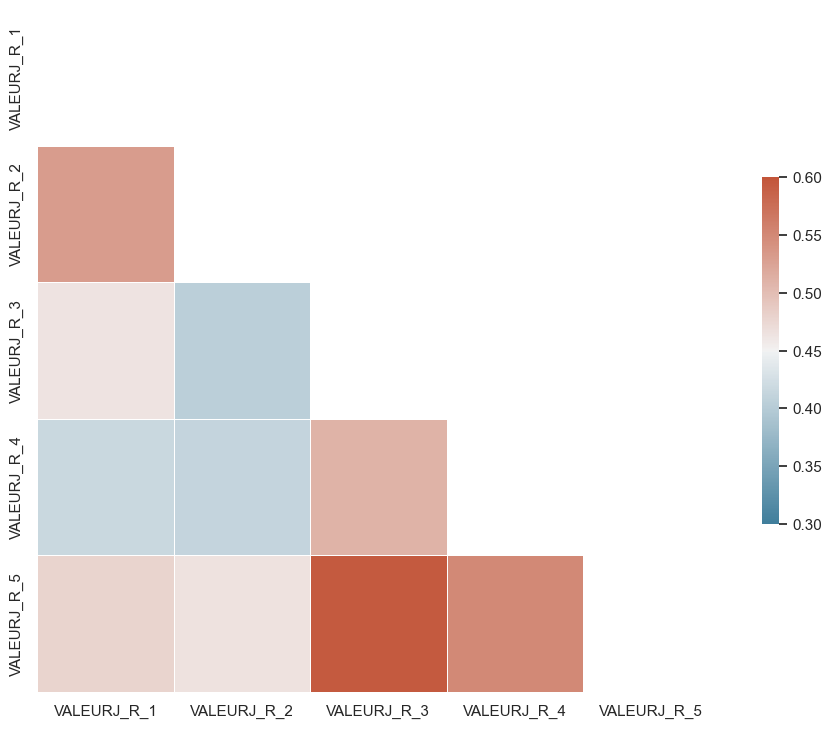

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


d = arcom.filter(regex=r"VALEURJ.*").dropna()

corr = d.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.6, vmin=0.3, center=0.45,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
arcom["VALEURJ_R_3"].unique()

array([nan,  4.,  6.,  3.,  1.,  5.,  2.])

In [39]:
arcom["DEFIANCEJ_R_2"].unique()

array([nan,  4.,  1.,  3.,  2.])

In [38]:
arcom[["ATTENTESJ_R_1","DEFIANCEJ_R_1","DEFIANCEJ_R_2"]]

,ATTENTESJ_R_1,DEFIANCEJ_R_1,DEFIANCEJ_R_2
0,NaN,NaN,NaN
1,3.0,1.0,4.0
2,1.0,4.0,4.0
3,NaN,NaN,NaN
4,2.0,1.0,4.0
...,...,...,...
3341,1.0,4.0,4.0
3342,2.0,2.0,4.0
3343,NaN,NaN,NaN
3344,3.0,4.0,4.0


In [25]:
arcom[arcom.filter(regex=r"COMPLOT1_R_(\d+)").columns]

,COMPLOT1_R_1,COMPLOT1_R_2,COMPLOT1_R_3,COMPLOT1_R_4,COMPLOT1_R_5,COMPLOT1_R_6,COMPLOT1_R_7,COMPLOT1_R_8
0,1,1,1,1,2,1,1,1
1,2,1,2,1,2,1,2,1
2,1,2,2,1,2,1,1,1
3,1,1,2,2,1,1,1,2
4,1,1,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...
3341,1,2,2,2,2,1,1,2
3342,1,1,1,2,1,1,1,1
3343,1,1,2,1,1,1,2,2
3344,1,1,2,2,2,1,2,1


In [ ]:
var_obj = "Tranche d'âge"
liste_obj, cols_data, var, title = var_selection(var_obj)
title += " sur leurs motivations à s'informer"
    
liste_obj.sort()
cols_motiv = arcom.filter(regex=r"MOTIVRS_R_(\d)").columns

count_motivs = defaultdict(dict)
for item, ref in zip(liste_obj, cols_data):
    for col in cols_motiv:
        count_motivs[ref][col] = {
            "Comprendre le monde qui m'entoure": (arcom[(arcom[var] == item)][col] == 1).sum(),
            "Rester informé des grands évènements": (arcom[(arcom[var] == item)][col] == 2).sum(),
            "Me faire ma propre opinion": (arcom[(arcom[var] == item)][col] == 3).sum(),
            "Prendre des décisions éclairées": (arcom[(arcom[var] == item)][col] == 4).sum(),
            "Pouvoir en discuter/débattre": (arcom[(arcom[var] == item)][col] == 5).sum(),
            "Me divertir": (arcom[(arcom[var] == item)][col] == 6).sum(),
            "Découvrir de nouvelles tendances culturelles": (arcom[(arcom[var] == item)][col] == 7).sum(),
            "Satisfaire ma curiosité": (arcom[(arcom[var] == item)][col] == 8).sum(),
            "Passer le temps": (arcom[(arcom[var] == item)][col] == 9).sum(),
            "M'instruire / me cultiver": (arcom[(arcom[var] == item)][col] == 10).sum(),
            "Progresser dans mon travail/mes études": (arcom[(arcom[var] == item)][col] == 11).sum(),
            "Connaître d'autres avis que le mien": (arcom[(arcom[var] == item)][col] == 12).sum(),
        }

rows = []
for ref, motiv_data in count_motivs.items():
    sum_motivations = {}  
    total_sum = 0  

    for _, motivations in motiv_data.items():
        for motivation, value in motivations.items():
            sum_motivations[motivation] = sum_motivations.get(motivation, 0) + value
            total_sum += value  

    for motivation, total in sum_motivations.items():
        if total_sum > 0:
            valeur_norm = total / total_sum  
        else:
            valeur_norm = 0  
        rows.append({"ref": ref, "Motivation": motivation, "Valeur": round(valeur_norm,3)})

df = pd.DataFrame(rows)

chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('ref:O', title='Tranche d\'âge'),
    y=alt.Y('Motivation:N', title='Motivation'),
    color=alt.Color('Valeur:Q', scale=alt.Scale(scheme='spectral')),
    tooltip=['ref', 'Motivation', 'Valeur']
).configure_view(
    fill=None, 
    stroke=None
).properties(
    title={
        "text": title,
        "subtitle": "Source : Arcom 2024, base : 3356 répondants",
        "subtitleColor": "white",
    },
    width=700,
    height=450
)

chart

alt.Chart(...)

In [24]:
liste_obj, cols_data, var, title = var_selection(var_obj)

cols_radio = arcom.filter(regex=r"SOURCES1AR_B1_R_(\d)").columns
radio = {"Radio" :[
    "Europe 1",
    "France Bleu",
    "France Inter",
    "RMC",
    "RTL",
    "France info",
    "Radio Classique",
    "France Culture",
    "BFM Business",
    "Sud Radio",
    "RFI",
    "Radio Locale",
    "une autre radio",
    "Rien de tout cela",
]}
cols_journaux = arcom.filter(regex=r"SOURCES1BR_B2_R_(\d)").columns
journaux = {"Journaux":[
    "Le Monde",
    "Le Parisien",
    "Le Figaro",
    "Les Echos",
    "L'Equipe",
    "la Croix",
    "Libération",
    "L'Humanité",
    "Mediapart",
    "Huffington Post",
    "Un journal regional",
    "Un journal sortant le dimanche",
    "un joural satirique",
    "Un journal gratuit",
    "Un autre journal",
    "Rien de tout cela",
]}
cols_tv = arcom.filter(regex=r"SOURCES1ER_B4_R_(\d)").columns
tv = {"TV":[
    "France Info",
    "LCI",
    "BFM TV",
    "C News",
    "France 24",
    "Chaine d'information internationale (Al Jazeera, CNN, etc.)",
    "Une autre chaine d'information internationale",
    "Rien de tout cela",
]}

cols_radio, cols_journaux, cols_tv = cols_radio[:-1], cols_journaux[:-1], cols_tv[:-1]
cols_tot = cols_radio.tolist() + cols_journaux.tolist() + cols_tv.tolist()

dict_glob = radio | journaux| tv

counts_per_column = defaultdict(dict)   

rows = []

for item, ref in zip(liste_obj, cols_data):
    for col in cols_tot:
        counts_per_column[ref][col] = {
            f"{source}": {
                f"{clef}": (arcom[arcom[var] == item][col] == i).sum()
                for i, clef in enumerate(dict_glob[source], start=1)
                if clef in dict_glob[source]
            }
            for source in dict_glob.keys()
        }

rows = []

for i,tranche in enumerate(counts_per_column.keys(), start=1): 
    total_media_type = 0
    for media_type in ['Radio', 'Journaux', 'TV']:
        for sous_clef in counts_per_column[tranche]:  
            total_media_type = sum(counts_per_column[tranche][sous_clef][media_type].values()) + total_media_type 
    
        rows.append({'Tranche d\'âge': tranche, 'Type de média': media_type, 'Pourcentage': total_media_type})
            

df = pd.DataFrame(rows)



df["Pourcentage"] = df["Pourcentage"] / df.groupby("Tranche d'âge")["Pourcentage"].transform("sum")
df_large = df.pivot(index="Tranche d'âge", columns="Type de média", values='Pourcentage')
df_large.reset_index(inplace=True)
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(df_large, x='Journaux', y='Radio', z='TV',
            color="Tranche d'âge", size_max=20,
            symbol="Tranche d'âge", opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                    xaxis = dict(showgrid=True, gridwidth=2, linewidth=2),
                    coloraxis = dict(colorscale='viridis'))
fig.show()

In [226]:
def Graphe_conf_niv(arcom, var_obj):
    cols_conf = arcom.filter(regex=r"INF3_R1_(\d)").columns

    liste_obj, cols_data, var, title = var_selection(var_obj)

    title += " en la confiance accordée aux sources d'information"

    columns_conf = defaultdict(dict)

    for item, ref in zip(liste_obj, cols_data):
        for col in cols_conf:
            columns_conf[ref][col] = {
                "Journalistes": (arcom[(arcom[var] == item)][col] == 1).sum(),
                "Experts Invités": (arcom[(arcom[var] == item)][col] == 2).sum(),
                "Perso° Politiques GVT": (arcom[(arcom[var] == item)][col] == 3).sum(),
                "Autres Perso° Politiques": (arcom[(arcom[var] == item)][col] == 4).sum(),
                "Célébrités": (arcom[(arcom[var] == item)][col] == 5).sum(),
                "Créateurs Contenu": (arcom[(arcom[var] == item)][col] == 6).sum(),
                "Associations/ACDT": (arcom[(arcom[var] == item)][col] == 7).sum(),
                "Anonymes": (arcom[(arcom[var] == item)][col] == 8).sum(),
                "Proches": (arcom[(arcom[var] == item)][col] == 9).sum(),
            }

    rows = []
    for ref, motiv_data in columns_conf.items():
        sum_motivations = {}  
        total_sum = 0  

        for _, motivations in motiv_data.items():
            for motivation, value in motivations.items():
                sum_motivations[motivation] = sum_motivations.get(motivation, 0) + value
                total_sum += value  

        for motivation, total in sum_motivations.items():
            if total_sum > 0:
                valeur_norm = total / total_sum  
            else:
                valeur_norm = 0  
            rows.append({"ref": ref, "Source": motivation, "Valeur": round(valeur_norm,3)})

    df = pd.DataFrame(rows)

    chart = alt.Chart(df).mark_bar().encode(
        x=alt.X('ref:N', title=""),
        y=alt.Y('Valeur:Q', title="", stack="normalize"),
        color=alt.Color('Source:N', title="Source"),
        tooltip=['ref', 'Source', 'Valeur']
    ).configure_view(
        fill=None, 
        stroke=None
    ).properties(
        title={
            "text": title,
            "subtitle": "Source : Arcom 2024, base : 3356 répondants",
            "subtitleColor": "white",
        },
        width=700,
        height=400
    )

    return chart

var_obj = "Tranche d'âge"
Graphe_conf_niv(arcom, var_obj)

alt.Chart(...)

In [ ]:
var_obj = "Revenu"
def Graphe_repartition_répondants(arcom,var_obj):
    _, cols_data, var, title = var_selection(var_obj)

    dict_values = arcom[var].value_counts().sort_index().to_dict()
    nb_rep=sum(dict_values.values())
    dict_values = dict(zip(cols_data, dict_values.values()))

    df = pd.DataFrame({"Catégorie": list(dict_values.keys()), "Nombre": np.array(list(dict_values.values()))/nb_rep})

    title.split("par ")

    chart = alt.Chart(df).mark_arc().encode(
        theta=alt.Theta("Nombre:Q"),
        color=alt.Color("Catégorie:N"),
        tooltip=["Catégorie", "Nombre"]
    ).properties(
        title=f"Répartition {title.split("Préférences ")[1]}",
        width=700,
        height=450
    )
    return chart

    

alt.Chart(...)

In [14]:
arcom["RS14_R"].value_counts()

RS14_R
2    1244
3     846
1     483
4     373
6     338
5      62
Name: count, dtype: int64

In [12]:
scatter_chart = alt.Chart(df).mark_point().encode(
    x=alt.X('ref:O', title='Tranche d\'âge'),
    y=alt.Y('Motivation:N', title='Motivation'),
    color='Valeur:Q',
    tooltip=['ref', 'Motivation', 'Valeur']
).configure_view(
    fill=None, 
    stroke=None
).properties(
    title={
        "text": title,
        "subtitle": "Source : Arcom 2024, base : 3356 répondants",
        "subtitleColor": "white",
    },
    width=700,
    height=450
)

scatter_chart

alt.Chart(...)

In [8]:
df

,ref,Motivation,Valeur
0,15-17 ans,Comprendre le monde qui m'entoure,0.139
1,15-17 ans,Rester informé des grands évènements,0.075
2,15-17 ans,Me faire ma propre opinion,0.012
3,15-17 ans,Prendre des décisions éclairées,0.081
4,15-17 ans,Pouvoir en discuter/débattre,0.110
...,...,...,...
79,70 ans et plus,Satisfaire ma curiosité,0.040
80,70 ans et plus,Passer le temps,0.118
81,70 ans et plus,M'instruire / me cultiver,0.115
82,70 ans et plus,Progresser dans mon travail/mes études,0.099


In [41]:
liste_obj = arcom["RS2C_RECODE_AG_R"].value_counts().keys().tolist()
cols_data = [
    "15-17 ans",
    "18-24 ans",
    "25-34 ans",
    "35-44 ans",
    "45-59 ans",
    "60-69 ans",
    "70 ans et plus",
]

liste_obj.sort()

In [38]:
res = pd.DataFrame()

for item, ref in zip(liste_obj, cols_data):
    test = arcom[arcom["RS2C_RECODE_AG_R"] == item]
    colonnes = test.filter(regex=r"SOURCES1(\w)R_B(\d)_R_(\d)").columns
    distribution = test[colonnes].notna().sum(axis=1).value_counts().reset_index()
    
    distribution.columns = ['Nombre de sources', 'Nb réponses']
    distribution['ref'] = ref
    distribution_inf_25 = distribution[distribution['Nombre de sources'] < 25]
    distribution_25_plus = pd.DataFrame({
        'ref': ref,
        'Nombre de sources': ['25+'],
        'Nb réponses': distribution['Nb réponses'][distribution['Nombre de sources'] >= 25].sum()
    })
    
    res = pd.concat([res, pd.concat([distribution_inf_25, distribution_25_plus])], ignore_index=True)

res['Nombre de sources'] = res['Nombre de sources'].astype(str)
nombres_sources = res['Nombre de sources'].unique()
nombres_sources_sorted = sorted([x for x in nombres_sources if x != '25+'], key=int)
nombres_sources_sorted.append('25+')
res['Nb réponses normalisé'] = res.groupby('ref')['Nb réponses'].transform(lambda x: x / x.sum())



In [41]:
res[res["ref"]== "Moins de 1500 net"]["Nb réponses normalisé"].sum()

np.float64(0.9999999999999998)

In [39]:
res

,Nombre de sources,Nb réponses,ref,Nb réponses normalisé
0,0,26,Moins de 1500 net,0.247619
1,5,20,Moins de 1500 net,0.190476
2,6,12,Moins de 1500 net,0.114286
3,7,10,Moins de 1500 net,0.095238
4,8,7,Moins de 1500 net,0.066667
...,...,...,...,...
119,19,4,Ne souhaite pas répondre,0.007018
120,24,4,Ne souhaite pas répondre,0.007018
121,20,4,Ne souhaite pas répondre,0.007018
122,23,3,Ne souhaite pas répondre,0.005263


In [62]:
chart = alt.Chart(res).mark_area(
    interpolate='monotone',
    fillOpacity=0.8,
    stroke='lightgray',
    strokeWidth=0.5
).encode(
    x=alt.X('Nombre de sources:N', sort=nombres_sources_sorted),
    y='Nb réponses:Q',
    color='ref:N'
).properties(
    title='Sources d\'information utilisées par les Français',
    width=600,
    height=400
)

chart

alt.Chart(...)

In [ ]:
import pandas as pd
import altair as alt



chart = alt.Chart(res).mark_area(
    interpolate='monotone',
    fillOpacity=0.8,
    stroke='lightgray',
    strokeWidth=0.5
).encode(
    x=alt.X('Nombre de sources:N', sort=nombres_sources_sorted),
    y='Nb réponses:Q',
    color='ref:N'
).properties(
    title='Sources d\'information utilisées par les Français',
    width=600,
    height=400
)

Final = alt.hconcat(chart, chart_1)  # Place side by side


Final

alt.HConcatChart(...)

In [89]:
arcom.filter(regex=r"NEWS1(.+)").columns.tolist()

['NEWS1_R_1',
 'NEWS1_R_2',
 'NEWS1_R_3',
 'NEWS1_R_4',
 'NEWS1_R_5',
 'NEWS1_R_6',
 'NEWS1_R_7',
 'NEWS1_R_8',
 'NEWS1_R1_1',
 'NEWS1_R1_2',
 'NEWS1_R1_3',
 'NEWS1_R1_4',
 'NEWS1_R1_5',
 'NEWS1_R1_6',
 'NEWS1_R1_7',
 'NEWS1_R1_8',
 'NEWS1_R1_9',
 'NEWS1_R2_1',
 'NEWS1_R2_2',
 'NEWS1_R2_3',
 'NEWS1_R2_4',
 'NEWS1_R2_5',
 'NEWS1_R2_6',
 'NEWS1_R2_7',
 'NEWS1_R2_8',
 'NEWS1_R2_9',
 'NEWS1_1B_R',
 'NEWS1_2B_R',
 'NEWS1_3B_R',
 'NEWS1SOURCES_LR6_R',
 'NEWS1SOURCES_LR7_R',
 'NEWS1SOURCES_LR8_R',
 'NEWS1SOURCES_LR9_R',
 'NEWS1SOURCES_R_1',
 'NEWS1SOURCES_R_2',
 'NEWS1SOURCES_R_3',
 'NEWS1SOURCES_R_4',
 'NEWS1SOURCES_R_5',
 'NBR_NEWS1SOURCES_R1',
 'NEWS1SOURCES_R2_1',
 'NEWS1SOURCES_R2_2',
 'NEWS1SOURCES_R2_3',
 'NEWS1SOURCES_R2_4',
 'NEWS1SOURCES_R2_5',
 'NBR_NEWS1SOURCES_R3',
 'NEWS1BIS_R']

In [88]:
value_counts = {col: arcom[col].value_counts() for col in liste}
value_counts

{'PAY_R_1': PAY_R_1
 2    2444
 1     902
 Name: count, dtype: int64,
 'PAY_R_2': PAY_R_2
 2    3047
 1     299
 Name: count, dtype: int64,
 'PAY_R_3': PAY_R_3
 2    2726
 1     620
 Name: count, dtype: int64,
 'PAY_R_4': PAY_R_4
 2.0    3027
 1.0     186
 Name: count, dtype: int64,
 'PAY_R_5': PAY_R_5
 2.0    2992
 1.0     221
 Name: count, dtype: int64,
 'PAY_R_6': PAY_R_6
 2.0    3060
 1.0     153
 Name: count, dtype: int64,
 'PAY_R_7': PAY_R_7
 2.0    3038
 1.0     175
 Name: count, dtype: int64,
 'PAY_R1_1': PAY_R1_1
 8    2022
 1     902
 3     263
 2      84
 7      25
 4      23
 5      19
 6       8
 Name: count, dtype: int64,
 'PAY_R1_2': PAY_R1_2
 3.0    234
 2.0    215
 4.0     52
 5.0     47
 6.0     24
 7.0     20
 Name: count, dtype: int64,
 'PAY_R1_3': PAY_R1_3
 3.0    123
 5.0     64
 4.0     50
 6.0     25
 7.0     21
 Name: count, dtype: int64,
 'PAY_R1_4': PAY_R1_4
 4.0    61
 5.0    42
 6.0    35
 7.0    34
 Name: count, dtype: int64,
 'PAY_R1_5': PAY_R1_5
 5.0    

In [ ]:
alt.Chart(res, height=20).transform_joinaggregate(
    mean_rep='mean(Nb réponses)', groupby=['ref']
).transform_bin(
    ['bin_max', 'bin_min'], 'Nb réponses'
).transform_aggregate(
    value='count()', groupby=['ref', 'mean_rep', 'bin_min', 'bin_max']
).transform_impute(
    impute='Nb réponses', groupby=['ref', 'mean_rep'], key='bin_min', value=0
).mark_area(
    interpolate='monotone',
    fillOpacity=0.8,
    stroke='lightgray',
    strokeWidth=0.5
).encode(
    alt.X('bin_min:Q').bin('binned').axis(
        tickCount=10, 
        values=[0, 10, 20, 30, 40, 50, 60]  
    ),
    alt.Y('value:Q').axis(None),
    alt.Fill('mean_rep:Q')
        .legend(None)
        .scale(domain=[5, 45], scheme='redyellowblue')
).properties(
    width=600,
    height=400
).facet(
    row=alt.Row('ref:N').header(labelAngle=0, labelAlign='left')
).properties(
    bounds='flush'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_title(
    anchor='end'
)

In [ ]:
arcom[arcom["RS14_R"] == 1]

,RECORD,UUID,CIBLE,SOURCE_BASE_R1,POIDS03,INTER,CONTACT,RS1_R,RS2C_RECODE_AG_R,RS3_R,...,VA1_R2_7,VA1_R2_8,VA1_R2_9,NOU1_R,PP3_R,QUIZZ1_R,QUIZZ2_R,QUIZZ3_R,QUIZZ4_R,QUESTION_OUVERTE
1,NaN,NaN,NaN,1,"3,58505412001293",62701.0,NaN,2,6,6,...,NaN,NaN,NaN,6.0,15.0,1,2,2,3,NaN
5,NaN,NaN,NaN,1,"4,0000087157244",3065.0,NaN,1,6,1,...,NaN,NaN,NaN,1.0,1.0,3,1,2,1,NaN
9,NaN,NaN,NaN,1,"3,78404789222348",8576.0,NaN,1,7,6,...,NaN,NaN,NaN,1.0,13.0,1,1,2,1,NaN
17,NaN,NaN,NaN,1,"4,0000087157244",9838.0,NaN,2,6,6,...,NaN,NaN,NaN,5.0,1.0,3,4,1,4,NaN
20,NaN,NaN,NaN,1,"3,99051319648754",29089.0,NaN,1,7,6,...,NaN,NaN,NaN,6.0,13.0,1,1,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,5685.0,615jms9h2b3908ky,2.0,3,"0,130017776320162",NaN,NaN,2,6,6,...,NaN,NaN,NaN,6.0,14.0,1,4,2,4,La censure imposée par la société
3332,5700.0,q2k2kt2adf8qwgds,2.0,3,"0,164957395455826",NaN,NaN,2,2,4,...,NaN,NaN,NaN,9.0,16.0,1,4,2,1,Les pressions que subissent les journalistes p...
3333,5705.0,3tg2q511tj54srym,2.0,3,"0,446969984168498",NaN,NaN,2,6,7,...,NaN,NaN,NaN,8.0,16.0,4,4,4,4,Rien à dire
3341,5911.0,69bwh8msjc15z946,2.0,3,"0,502029079078932",NaN,NaN,2,4,2,...,NaN,NaN,NaN,8.0,14.0,4,4,2,1,Merci


In [ ]:
cols_motiv.tolist()

['MOTIVRS_R_1',
 'MOTIVRS_R_2',
 'MOTIVRS_R_3',
 'MOTIVRS_R_4',
 'MOTIVRS_R_5',
 'MOTIVRS_R_6',
 'MOTIVRS_R_7',
 'MOTIVRS_R_8',
 'MOTIVRS_R_9',
 'MOTIVRS_R_10',
 'MOTIVRS_R_11',
 'MOTIVRS_R_12']

In [ ]:
arcom[cols_motiv]

,MOTIVRS_R_1,MOTIVRS_R_2,MOTIVRS_R_3,MOTIVRS_R_4,MOTIVRS_R_5,MOTIVRS_R_6,MOTIVRS_R_7,MOTIVRS_R_8,MOTIVRS_R_9,MOTIVRS_R_10,MOTIVRS_R_11,MOTIVRS_R_12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3341,8.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3342,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3343,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3344,1.0,4.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
arcom[(arcom["RS14_R"] == 1)][cols_motiv]

,MOTIVRS_R_1,MOTIVRS_R_2,MOTIVRS_R_3,MOTIVRS_R_4,MOTIVRS_R_5,MOTIVRS_R_6,MOTIVRS_R_7,MOTIVRS_R_8,MOTIVRS_R_9,MOTIVRS_R_10,MOTIVRS_R_11,MOTIVRS_R_12
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3329,4.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3332,6.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3333,1.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3341,8.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
arcom[(arcom["RS14_R"] == 2)]["MOTIVRS_R_1"]

0       NaN
2       NaN
3       NaN
4       NaN
6       NaN
       ... 
3336    5.0
3338    5.0
3339    2.0
3340    5.0
3343    5.0
Name: MOTIVRS_R_1, Length: 1244, dtype: float64

In [ ]:
cols_motiv = arcom.filter(regex=r"MOTIVRS_R_(\d)").columns
sub_df = arcom[arcom["RS14_R"] == 1]
sub_df = sub_df[cols_motiv.tolist()]
sub_df

,MOTIVRS_R_1,MOTIVRS_R_2,MOTIVRS_R_3,MOTIVRS_R_4,MOTIVRS_R_5,MOTIVRS_R_6,MOTIVRS_R_7,MOTIVRS_R_8,MOTIVRS_R_9,MOTIVRS_R_10,MOTIVRS_R_11,MOTIVRS_R_12
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3329,4.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3332,6.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3333,1.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3341,8.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols_data = [
    "Moins de 1500 net",
    "Entre 1500 et 3000 net",
    "Entre 3000 et 4500",
    "Entre 4500 et 7500",
    "7500 et plus",
    "Ne souhaite pas répondre",
]

cols_data

['Moins de 1500 net',
 'Entre 1500 et 3000 net',
 'Entre 3000 et 4500',
 'Entre 4500 et 7500',
 '7500 et plus',
 'Ne souhaite pas répondre']

In [ ]:
import pandas as pd
import altair as alt
from collections import defaultdict

def Graphe_motivations(arcom, var_obj):
    if var_obj == "Tranche d'âge":
        liste_obj = arcom["RS2C_RECODE_AG_R"].value_counts().keys().tolist()
        cols_data = [
            "15-17 ans",
            "18-24 ans",
            "25-34 ans",
            "35-44 ans",
            "45-59 ans",
            "60-69 ans",
            "70 ans et plus",
        ]
        var = "RS2C_RECODE_AG_R"
        title = "Préférences des répondants par tranche d'âge sur qui leur propose l'information"
    elif var_obj == "Catégorie socio-professionnelle":
        liste_obj = arcom["RS4_R"].value_counts().keys().tolist()
        cols_data = [
            "Agriculteur",
            "Artisan/Commerçant",
            "Cadre/Profession libérale",
            "Profession intermédiaire",
            "Employé",
            "Ouvrier",
            "Je ne sais pas/Je ne réponds pas",
        ]
        var = "RS4_R"
        title = "Préférences des répondants par catégorie socio-professionnelle"
    elif var_obj == "Niveau d'étude":
        liste_obj = arcom["RS5_R"].value_counts().keys().tolist()
        cols_data = [
            "Niveau Primaire",
            "Secondaire 6°-3°",
            "Secondaire 2nd-terminale",
            "Technique court(CAP,BEP,...)",
            "Baccalauréat",
            "Technique supérieur",
            "Supérieur 1er Cycle",
            "Supérieur 2nd Cycle",
            "Doctorat",
        ]
        var = "RS5_R"
        title = "Préférences des répondants par niveau d'étude"
    elif var_obj == "Revenu":
        liste_obj = arcom["RS14_R"].value_counts().keys().tolist()
        cols_data = [
            "Moins de 1500 net",
            "Entre 1500 et 3000 net",
            "Entre 3000 et 4500",
            "Entre 4500 et 7500",
            "7500 et plus",
            "Ne souhaite pas répondre",
        ]
        var = "RS14_R"
        title = "Préférences des répondants par niveau de revenu"

    liste_obj.sort()
    cols_motiv = arcom.filter(regex=r"MOTIVRS_R_(\d)").columns

    count_motivs = defaultdict(dict)
    for item, ref in zip(liste_obj, cols_data):
        for col in cols_motiv:
            count_motivs[ref][col] = {
                "Comprendre le monde qui m'entoure": (arcom[(arcom[var] == item)][col] == 1).sum(),
                "Rester informé des grands évènements": (arcom[(arcom[var] == item)][col] == 2).sum(),
                "Me faire ma propre opinion": (arcom[(arcom[var] == item)][col] == 3).sum(),
                "Prendre des décisions éclairées": (arcom[(arcom[var] == item)][col] == 4).sum(),
                "Pouvoir en discuter/débattre": (arcom[(arcom[var] == item)][col] == 5).sum(),
                "Me divertir": (arcom[(arcom[var] == item)][col] == 6).sum(),
                "Découvrir de nouvelles tendances culturelles": (arcom[(arcom[var] == item)][col] == 7).sum(),
                "Satisfaire ma curiosité": (arcom[(arcom[var] == item)][col] == 8).sum(),
                "Passer le temps": (arcom[(arcom[var] == item)][col] == 9).sum(),
                "M'instruire / me cultiver": (arcom[(arcom[var] == item)][col] == 10).sum(),
                "Progresser dans mon travail/mes études": (arcom[(arcom[var] == item)][col] == 11).sum(),
                "Connaître d'autres avis que le mien": (arcom[(arcom[var] == item)][col] == 12).sum(),
            }

    rows = []
    for numero, motiv_data in count_motivs.items():
        sum_motivations = {}  
        total_sum = 0  

        for _, motivations in motiv_data.items():
            for motivation, value in motivations.items():
                sum_motivations[motivation] = sum_motivations.get(motivation, 0) + value
                total_sum += value  

        for motivation, total in sum_motivations.items():
            if total_sum > 0:
                valeur_norm = total / total_sum  
            else:
                valeur_norm = 0  
            rows.append({"Numéro": numero, "Motivation": motivation, "Valeur": round(valeur_norm,3)})

    df = pd.DataFrame(rows)

    chart = alt.Chart(df).mark_bar().encode(
        x=alt.X('Numéro:N', title=""),
        y=alt.Y('Valeur:Q', title="", stack="normalize"), 
        color=alt.Color('Motivation:N', title="Motivation"),
        tooltip=['Numéro', 'Motivation', 'Valeur']
    ).properties(
        title=title,
        width=700,
        height=400
    )

    return chart

Graphe_motivations(arcom, "Revenu")


alt.Chart(...)

In [ ]:
import numpy as np
import pandas as pd
import altair as alt
from collections import defaultdict

# 🔹 Exemple de ton dictionnaire reformatté
data = defaultdict(dict, {
    '1': {
        'MOTIVRS_R_1': {
            'Comprendre le monde qui m entoure': np.int64(24),
            'Rester informer des grands évènements': np.int64(10),
            'Me faire ma propre opinion': np.int64(2),
            'Prendre des décisions éclairées': np.int64(8),
            'Pouvoir en discuter/débattre': np.int64(9),
            'Me divertir': np.int64(12),
            'Découvrir de nouvelles tendances culturelles': np.int64(3),
            'Satisfaire ma curiosité': np.int64(2),
            'Passer le temps': np.int64(1),
            "M'instruire me cultiver": np.int64(3),
            'Progresser dans mon travail/mes études': np.int64(2),
            "Connaître d'autres avis que le mien": np.int64(0)
        },
        'MOTIVRS_R_2': {
            'Comprendre le monde qui m entoure': np.int64(0),
            'Rester informer des grands évènements': np.int64(3),
            'Me faire ma propre opinion': np.int64(0),
            'Prendre des décisions éclairées': np.int64(6),
            'Pouvoir en discuter/débattre': np.int64(8),
            'Me divertir': np.int64(13),
            'Découvrir de nouvelles tendances culturelles': np.int64(12),
            'Satisfaire ma curiosité': np.int64(2),
            'Passer le temps': np.int64(10),
            "M'instruire me cultiver": np.int64(0),
            'Progresser dans mon travail/mes études': np.int64(2),
            "Connaître d'autres avis que le mien": np.int64(0)
        }
    }
})

# 🔹 Transformer le dictionnaire en une liste de données
data_list = []
for numero, motiv_data in data.items():
    for motiv_key, motivations in motiv_data.items():
        for motivation, value in motivations.items():
            data_list.append({'Numéro': numero, 'Motivation': motivation, 'Valeur': value})

# 🔹 Convertir en DataFrame
df = pd.DataFrame(data_list)

# 🔹 Créer un graphique Altair (barres empilées)
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Numéro:N', title='Numéro de catégorie'),
    y=alt.Y('sum(Valeur):Q', title='Nombre de réponses'),
    color=alt.Color('Motivation:N', title="Motivation", legend=alt.Legend(orient="right")),
    tooltip=['Numéro', 'Motivation', 'Valeur']
).properties(
    title="Graphique en barres empilées des motivations",
    width=600,
    height=400
)

chart.show()


alt.Chart(...)

In [ ]:
import numpy as np
import pandas as pd
import altair as alt

# Exemple de ton dictionnaire
data = {
    'MOTIVRS_R_1': {
        '1': {'Comprendre le monde qui m entoure': np.int64(24), 'Rester informer des grands évènements': np.int64(10)},
        '2': {'Comprendre le monde qui m entoure': np.int64(81), 'Rester informer des grands évènements': np.int64(35)},
        '3': {'Comprendre le monde qui m entoure': np.int64(89), 'Rester informer des grands évènements': np.int64(57)},
    }
}

# Transformer le dictionnaire en DataFrame
df = pd.DataFrame.from_dict({(key, subkey): values
                             for key, subdict in data.items()
                             for subkey, values in subdict.items()},
                            orient='index')

# Réinitialiser l'index pour l'utiliser avec Altair
df.reset_index(inplace=True)
df.rename(columns={'level_0': 'Question', 'level_1': 'Numéro'}, inplace=True)

# Sélectionner une motivation spécifique
motivation = "Comprendre le monde qui m entoure"

# Créer un DataFrame adapté à Altair
df_altair = df[['Numéro', motivation]].dropna()
df_altair['Numéro'] = df_altair['Numéro'].astype(str)  # Assurer que Numéro est une chaîne (catégorique)

# Créer un graphique Altair
chart = alt.Chart(df_altair).mark_bar(color="skyblue").encode(
    x=alt.X('Numéro:N', title='Catégorie (1,2,3,...)'),
    y=alt.Y(f'{motivation}:Q', title='Nombre de réponses'),
    tooltip=['Numéro', motivation]  # Affichage des valeurs au survol
).properties(
    title=f"Motivation : {motivation}",
    width=500,
    height=300
)

chart.show()



alt.Chart(...)

In [ ]:
df

,Question,Numéro,Comprendre le monde qui m entoure,Rester informer des grands évènements
0,MOTIVRS_R_1,1,24,10
1,MOTIVRS_R_1,2,81,35
2,MOTIVRS_R_1,3,89,57


In [ ]:
arcom["MOTIVRS_R_4"].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
len(arcom[(arcom["RS2C_RECODE_AG_R"] == 1) & (arcom["MOTIVRS_R_1"].notna())])

76

In [ ]:
len(arcom[(arcom["RS2C_RECODE_AG_R"] == 1) & (arcom["MOTIVRS_R_1"] == )]) / len(arcom[(arcom["RS2C_RECODE_AG_R"] == 1) & (arcom["MOTIVRS_R_1"].notna())])

0.3157894736842105

In [ ]:
arcom["RS2C_RECODE_AG_R"].value_counts().keys().tolist()

[5, 6, 4, 7, 3, 2, 1]

In [ ]:
arcom.columns.tolist()

['RECORD',
 'UUID',
 'CIBLE',
 'SOURCE_BASE_R1',
 'POIDS03',
 'INTER',
 'CONTACT',
 'RS1_R',
 'RS2C_RECODE_AG_R',
 'RS3_R',
 'RS4_R',
 'CSPIND_R',
 'RS5_R',
 'UDA9_R',
 'UDA5_R',
 'DPT_DOM_R',
 'CC_R',
 'RS7_R',
 'RS14_R',
 'ILLECTRO_R',
 'RS15_R',
 'FREQ_INTERNET_R',
 'RS16_R_1',
 'RS16_R_2',
 'RS16_R_3',
 'RS16_R_4',
 'RS16_R_5',
 'RS16_R_6',
 'RS16_R_7',
 'RS16_R_8',
 'RS16_R_9',
 'RS16_R_10',
 'RS16_R_11',
 'RS16_R_12',
 'RS16_R1_1',
 'RS16_R1_2',
 'RS16_R1_3',
 'RS16_R1_4',
 'RS16_R1_5',
 'RS16_R1_6',
 'RS16_R1_7',
 'RS16_R1_8',
 'RS16_R1_9',
 'RS16_R1_10',
 'RS16_R1_11',
 'RS16_R1_12',
 'RS16_R1_13',
 'RS16_R2_1',
 'RS16_R2_2',
 'RS16_R2_3',
 'RS16_R2_4',
 'RS16_R2_5',
 'RS16_R2_6',
 'RS16_R2_7',
 'RS16_R2_8',
 'RS16_R2_9',
 'RS16_R2_10',
 'RS16_R2_11',
 'RS16_R2_12',
 'RS16_R2_13',
 'RS16_R3_1',
 'RS16_R3_2',
 'RS16_R3_3',
 'RS16_R3_4',
 'RS16_R3_5',
 'RS16_R3_6',
 'RS16_R3_7',
 'RS16_R3_8',
 'RS16_R3_9',
 'RS16_R3_10',
 'RS16_R3_11',
 'RS16_R3_12',
 'RS16_R3_13',
 'INT1_R',
 'I

In [ ]:
from collections import Counter

counter_quizz1 = Counter(arcom["QUIZZ1_R"])  # Bonne réponse = 2
counter_quizz2 = Counter(arcom["QUIZZ2_R"])  # Bonne réponse = 1
counter_quizz3 = Counter(arcom["QUIZZ3_R"])  # Bonne réponse = 2
counter_quizz4 = Counter(arcom["QUIZZ4_R"])  # Bonne réponse = 2

# Stocker les résultats dans un dictionnaire
dict_arcom_quizz = {
    "QUIZZ1_INTER_R_2": dict(counter_quizz1.items()),
    "QUIZZ2_INTER_R_1": dict(counter_quizz2.items()),
    "QUIZZ3_NATIO_R_2": dict(counter_quizz3.items()),
    "QUIZZ4_ECO_R_2": dict(counter_quizz4.items())
}


In [ ]:
dict_arcom_quizz

{'QUIZZ1_INTER_R_2': {4: 1210, 1: 2027, 3: 21, 2: 88},
 'QUIZZ2_INTER_R_1': {2: 484, 3: 227, 1: 892, 4: 1743},
 'QUIZZ3_NATIO_R_2': {2: 556, 1: 1645, 4: 1065, 3: 80},
 'QUIZZ4_ECO_R_2': {4: 1283, 3: 479, 1: 1356, 2: 228}}

In [ ]:
dict_arcom_quizz["QUIZZ1_INTER_R_2"][2]/sum(dict_arcom_quizz["QUIZZ1_INTER_R_2"].values())

0.02630005977286312

In [ ]:
chart =alt.Chart(pd.DataFrame(dict_arcom_quizz["QUIZZ1_INTER_R_2"].items())).mark_bar().encode(
    x=alt.X('0:N', title='Réponse'),
    y=alt.Y('1:Q', title='Nombre de réponses'),
)

chart.properties(
    width=500,
    height= 500,)

alt.Chart(...)

In [ ]:
import numpy as np

cols = arcom.filter(regex=r"INF3_R1_(\d)").columns
sub_df = arcom[cols]

counts_per_column = {}

for col in sub_df.columns:
    counts_per_column[col] = {
        'Journalistes': (sub_df[col] == 1).sum(),
        'Experts Invités ': (sub_df[col] == 2).sum(),
        'Perso° Politiques GVT': (sub_df[col] == 3).sum(),
        'Autres Perso° Politiques': (sub_df[col] == 4).sum(),
        'Célébrités': (sub_df[col] == 5).sum(),
        'Créateurs Contenu': (sub_df[col] == 6).sum(),
        'Associations/ACDT': (sub_df[col] == 7).sum(),
        'Anonymes': (sub_df[col] == 8).sum(),
        'Proches': (sub_df[col] == 9).sum(),
    }



In [ ]:
df = pd.DataFrame.from_dict(counts_per_column, orient="index")
df.reset_index(inplace=True)
df.rename(columns={"index": "CONF_NIV"}, inplace=True)

for _, clef in enumerate(df.columns[1:]):
    df[f'r_{clef}'] = df[f'{clef}'] / 2955

df_cumulee = df[[f'{clef}' for _, clef in enumerate(df.columns[1:])]].cumsum()

totaux = df[[f'{clef}' for _, clef in enumerate(df.columns[1:])]].sum()

df.loc['Total'] = totaux

df  ## Diapo 50 colonne droite



,CONF_NIV,Journalistes,Experts Invités,Perso° Politiques GVT,Autres Perso° Politiques,Célébrités,Créateurs Contenu,Associations/ACDT,Anonymes,Proches,r_Journalistes,r_Experts Invités,r_Perso° Politiques GVT,r_Autres Perso° Politiques,r_Célébrités,r_Créateurs Contenu,r_Associations/ACDT,r_Anonymes,r_Proches
0,INF3_R1_1,1925.0,518.0,23.0,46.0,42.0,32.0,128.0,20.0,123.0,0.651438,0.175296,0.007783,0.015567,0.014213,0.010829,0.043316,0.006768,0.041624
1,INF3_R1_2,0.0,1680.0,119.0,110.0,101.0,62.0,286.0,32.0,237.0,0.000000,0.568528,0.040271,0.037225,0.034179,0.020981,0.096785,0.010829,0.080203
2,INF3_R1_3,0.0,0.0,734.0,236.0,211.0,85.0,575.0,56.0,376.0,0.000000,0.000000,0.248393,0.079865,0.071404,0.028765,0.194585,0.018951,0.127242
3,INF3_R1_4,0.0,0.0,0.0,495.0,133.0,100.0,415.0,63.0,559.0,0.000000,0.000000,0.000000,0.167513,0.045008,0.033841,0.140440,0.021320,0.189171
4,INF3_R1_5,0.0,0.0,0.0,0.0,296.0,83.0,282.0,61.0,396.0,0.000000,0.000000,0.000000,0.000000,0.100169,0.028088,0.095431,0.020643,0.134010
5,INF3_R1_6,0.0,0.0,0.0,0.0,0.0,201.0,157.0,53.0,260.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.068020,0.053130,0.017936,0.087986
6,INF3_R1_7,0.0,0.0,0.0,0.0,0.0,0.0,196.0,53.0,145.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066328,0.017936,0.049069
7,INF3_R1_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165.0,75.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055838,0.025381
8,INF3_R1_9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055838
9,INF3_R1_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
sub_df = pd.DataFrame(df.iloc[0:11, 10:].iloc[10]).reset_index().rename(columns={"index": "Type"})
sub_df["Type"] = sub_df["Type"].apply(lambda x: x.split("_")[1])

In [ ]:
alt.Chart(sub_df).mark_bar().encode(
    x=alt.X('Type:N'),
    y=alt.Y('Total:Q', title='Ratio de réponses'),
    tooltip=["Type","Total"]
).properties(
    width=500,
    height= 500,
    title="Niveau de confiance accordé par les répodants par type de source")

alt.Chart(...)

In [ ]:
import numpy as np

cols = arcom.filter(regex=r"CONFINST_R1_(\d)").columns
sub_df = arcom[cols]

counts_per_column = {}

for col in sub_df.columns:
    counts_per_column[col] = {
        'compte_1': (sub_df[col] == 1).sum(),
        'compte_2': (sub_df[col] == 2).sum(),
        'compte_3': (sub_df[col] == 3).sum(),
        'compte_4': (sub_df[col] == 4).sum(),
        'compte_5': (sub_df[col] == 5).sum(),
        'compte_6': (sub_df[col] == 6).sum(),
        'compte_7': (sub_df[col] == 7).sum(),
        'compte_8': (sub_df[col] == 8).sum(),
        'compte_9': (sub_df[col] == 9).sum(),
    }



In [ ]:
df = pd.DataFrame.from_dict(counts_per_column, orient="index")
df.reset_index(inplace=True)
df.rename(columns={"index": "CONF_NIV"}, inplace=True)

for i in range(1, 10): 
    df[f'ratio_{i}'] = df[f'compte_{i}'] / 2955

df.sort_values(by="ratio_1", ascending=False, inplace=True)

df_cumulee = df[[f'ratio_{i}' for i in range(1, 10)]].cumsum()

totaux = df[[f'ratio_{i}' for i in range(1, 10)]].sum()

df.loc['Total'] = totaux


,CONF_NIV,compte_1,compte_2,compte_3,compte_4,compte_5,compte_6,compte_7,compte_8,compte_9,ratio_1,ratio_2,ratio_3,ratio_4,ratio_5,ratio_6,ratio_7,ratio_8,ratio_9
0,CONFINST_R1_1,808.0,1223.0,783.0,103.0,164.0,54.0,41.0,6.0,5.0,0.273435,0.413875,0.264975,0.034856,0.055499,0.018274,0.013875,0.002030,0.001692
1,CONFINST_R1_2,0.0,676.0,1128.0,399.0,497.0,179.0,139.0,4.0,12.0,0.000000,0.228765,0.381726,0.135025,0.168190,0.060575,0.047039,0.001354,0.004061
2,CONFINST_R1_3,0.0,0.0,636.0,782.0,662.0,407.0,276.0,21.0,12.0,0.000000,0.000000,0.215228,0.264636,0.224027,0.137733,0.093401,0.007107,0.004061
3,CONFINST_R1_4,0.0,0.0,0.0,588.0,756.0,554.0,491.0,50.0,35.0,0.000000,0.000000,0.000000,0.198985,0.255838,0.187479,0.166159,0.016920,0.011844
4,CONFINST_R1_5,0.0,0.0,0.0,0.0,572.0,633.0,616.0,107.0,45.0,0.000000,0.000000,0.000000,0.000000,0.193570,0.214213,0.208460,0.036210,0.015228
5,CONFINST_R1_6,0.0,0.0,0.0,0.0,0.0,542.0,618.0,185.0,63.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.183418,0.209137,0.062606,0.021320
6,CONFINST_R1_7,0.0,0.0,0.0,0.0,0.0,0.0,531.0,279.0,71.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.179695,0.094416,0.024027
7,CONFINST_R1_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,429.0,108.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145178,0.036548
8,CONFINST_R1_9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,283.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095770
9,CONFINST_R1_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
arcom["MOTIVRS_R_1"]

import numpy as np

cols = arcom.filter(regex=r"MOTIVRS_R_(\d)").columns
sub_df = arcom[cols]

counts_per_column = {}

for col in sub_df.columns:
    counts_per_column[col] = {
        'Comprendre le monde qui m entoure': (sub_df[col] == 1).sum(),
        'Rester informer des grands évènements': (sub_df[col] == 2).sum(),
        'Me faire ma propre opinion': (sub_df[col] == 3).sum(),
        'Predre des décisions éclairés': (sub_df[col] == 4).sum(),
        'Pouvoir en discuter/débattre': (sub_df[col] == 5).sum(),
        'Me divertir': (sub_df[col] == 6).sum(),
        'Découvrir de nouvelles tendances cultures': (sub_df[col] == 7).sum(),
        'Satisfaire ma curiosité': (sub_df[col] == 8).sum(),
        'Passer le temps': (sub_df[col] == 9).sum(),
        "M'instuire me cultiver": (sub_df[col] == 10).sum(),
        'Progresser dans mon travail/mes études': (sub_df[col] == 11).sum(),
        "Connaitre d'autre avis que le mien": (sub_df[col] == 12).sum(),
    }

df = pd.DataFrame.from_dict(counts_per_column, orient="index")
df.reset_index(inplace=True)
df.rename(columns={"index": "MOTIV"}, inplace=True)

for _, clef in enumerate(df.columns[1:]):
    df[f'r_{clef}'] = df[f'{clef}'] / 2955

totaux = df[[f'{clef}' for _, clef in enumerate(df.columns[1:])]].sum()

df.loc['Total'] = totaux

sub_df = pd.DataFrame(df.iloc[0:13,13:].iloc[12]).reset_index().rename(columns={"index": "Motivations"})
sub_df["Motivations"] = sub_df["Motivations"].apply(lambda x: x.split("_")[1])

alt.Chart(sub_df).mark_bar().encode(
    x=alt.X('Motivations:N', axis=alt.Axis(labels=False), title=None),
    y=alt.Y('Total:Q', title='% de réponses'),
    tooltip=["Motivations:N","Total"],
    color="Motivations:N"
    ).configure_view(
    fill=None,
    stroke=None
    ).properties(
    width=500,
    height= 500,
    title="Niveau de confiance accordé par les répodants par type de source"
    )

alt.Chart(...)

In [ ]:
df

,MOTIV,compte_1,compte_2,compte_3,compte_4,compte_5,compte_6,compte_7,compte_8,compte_9,...,r_compte_5,r_compte_6,r_compte_7,r_compte_8,r_compte_9,r_compte_10,r_compte_11,r_compte_12,r_compte_13,r_compte_14
0,INFOFIABLEDEF_R_1,399.0,246.0,324.0,913.0,81.0,171.0,187.0,110.0,282.0,...,0.027411,0.057868,0.063283,0.037225,0.095431,0.015905,0.009475,0.017259,0.010152,0.027073
1,INFOFIABLEDEF_R_2,4.0,44.0,154.0,332.0,109.0,250.0,322.0,284.0,547.0,...,0.036887,0.084602,0.108968,0.096108,0.185110,0.059222,0.018951,0.058545,0.021320,0.000000
2,INFOFIABLEDEF_R_3,0.0,1.0,17.0,79.0,30.0,86.0,153.0,200.0,583.0,...,0.010152,0.029103,0.051777,0.067682,0.197293,0.112014,0.022673,0.129272,0.057191,0.000000
3,INFOFIABLEDEF_R_4,2.0,0.0,3.0,10.0,4.0,13.0,42.0,64.0,236.0,...,0.001354,0.004399,0.014213,0.021658,0.079865,0.103215,0.033841,0.148223,0.062606,0.000000
4,INFOFIABLEDEF_R_5,1.0,0.0,0.0,1.0,1.0,2.0,4.0,7.0,36.0,...,0.000338,0.000677,0.001354,0.002369,0.012183,0.025042,0.013536,0.117090,0.113706,0.000000
5,INFOFIABLEDEF_R_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,INFOFIABLEDEF_R_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,INFOFIABLEDEF_R_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,INFOFIABLEDEF_R_9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,INFOFIABLEDEF_R_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
arcom["MOTIVRS_R_1"]

import numpy as np

cols = arcom.filter(regex=r"INFOFIABLEDEF_R_(\d)").columns
sub_df = arcom[cols]

counts_per_column = {}

for col in sub_df.columns:
    counts_per_column[col] = {
        "Je connais l'auteur": (sub_df[col] == 1).sum(),
        "Elle est enoncée par un journaliste": (sub_df[col] == 2).sum(),
        "Elle vient d'un média très connu": (sub_df[col] == 3).sum(),
        'Elle est claire est détaillé': (sub_df[col] == 4).sum(),
        "Elle confirme mes opinions": (sub_df[col] == 5).sum(),
        "Elle vient d'un média indépendant": (sub_df[col] == 6).sum(),
        "Je vois qu'elle est reprise pas un grand nombre de média": (sub_df[col] == 7).sum(),
        "Je vois que l'information est récente": (sub_df[col] == 8).sum(),
        "Je peux vérifier facilement la source": (sub_df[col] == 9).sum(),
        "Je ne relève pas d'incohérence évidentes": (sub_df[col] == 10).sum(),
        "Mes proches m'en parlent": (sub_df[col] == 11).sum(),
        "Elle repose sur des preuves scientifiques": (sub_df[col] == 12).sum(),
        "Elle est accompagnée  d'une vidéo montrant les événements sans filtre": (sub_df[col] == 13).sum(),
        "Je ne me soucie pas trop de la fiabilité des informations": (sub_df[col] == 14).sum(),
    }

df = pd.DataFrame.from_dict(counts_per_column, orient="index")
df.reset_index(inplace=True)
df.rename(columns={"index": "SOURCES"}, inplace=True)

for _, clef in enumerate(df.columns[1:]):
    df[f'r_{clef}'] = df[f'{clef}'] / 2955

totaux = df[[f'{clef}' for _, clef in enumerate(df.columns[1:])]].sum()

df.loc['Total'] = totaux

sub_df = pd.DataFrame(df.iloc[0:15,15:].iloc[14]).reset_index().rename(columns={"index": "Sources"})
sub_df["Sources"] = sub_df["Sources"].apply(lambda x: x.split("_")[1])

alt.Chart(sub_df).mark_bar().encode(
    x=alt.X('Sources:N', axis=alt.Axis(labels=False), title=None),
    y=alt.Y('Total:Q', title='% de réponses'),
    tooltip=["Sources:N","Total"],
    color="Sources:N", 
    ).configure_view(
    fill=None,
    stroke=None
    ).properties(
    width=500,
    height= 500,
    title="Réponses des sondès sur la question ' Qu'est ce qu'une information 'fiable' '"
    )

alt.Chart(...)

In [ ]:
df

,MOTIV,compte_1,compte_2,compte_3,compte_4,compte_5,compte_6,compte_7,compte_8,compte_9,...,r_compte_5,r_compte_6,r_compte_7,r_compte_8,r_compte_9,r_compte_10,r_compte_11,r_compte_12,r_compte_13,r_compte_14
0,INFOFIABLEDEF_R_1,399.0,246.0,324.0,913.0,81.0,171.0,187.0,110.0,282.0,...,0.027411,0.057868,0.063283,0.037225,0.095431,0.015905,0.009475,0.017259,0.010152,0.027073
1,INFOFIABLEDEF_R_2,4.0,44.0,154.0,332.0,109.0,250.0,322.0,284.0,547.0,...,0.036887,0.084602,0.108968,0.096108,0.185110,0.059222,0.018951,0.058545,0.021320,0.000000
2,INFOFIABLEDEF_R_3,0.0,1.0,17.0,79.0,30.0,86.0,153.0,200.0,583.0,...,0.010152,0.029103,0.051777,0.067682,0.197293,0.112014,0.022673,0.129272,0.057191,0.000000
3,INFOFIABLEDEF_R_4,2.0,0.0,3.0,10.0,4.0,13.0,42.0,64.0,236.0,...,0.001354,0.004399,0.014213,0.021658,0.079865,0.103215,0.033841,0.148223,0.062606,0.000000
4,INFOFIABLEDEF_R_5,1.0,0.0,0.0,1.0,1.0,2.0,4.0,7.0,36.0,...,0.000338,0.000677,0.001354,0.002369,0.012183,0.025042,0.013536,0.117090,0.113706,0.000000
5,INFOFIABLEDEF_R_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,INFOFIABLEDEF_R_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,INFOFIABLEDEF_R_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,INFOFIABLEDEF_R_9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,INFOFIABLEDEF_R_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
arcom["MOTIVRS_R_1"]

import numpy as np

cols = arcom.filter(regex=r"INFOFIABLEDEF_R_(\d)").columns
sub_df = arcom[cols]

counts_per_column = {}

for col in sub_df.columns:
    counts_per_column[col] = {
        "Je connais l'auteur": (sub_df[col] == 1).sum(),
        "Elle est enoncée par un journaliste": (sub_df[col] == 2).sum(),
        "Elle vient d'un média très connu": (sub_df[col] == 3).sum(),
        'Elle est claire est détaillé': (sub_df[col] == 4).sum(),
        "Elle confirme mes opinions": (sub_df[col] == 5).sum(),
        "Elle vient d'un média indépendant": (sub_df[col] == 6).sum(),
        "Je vois qu'elle est reprise pas un grand nombre de média": (sub_df[col] == 7).sum(),
        "Je vois que l'information est récente": (sub_df[col] == 8).sum(),
        "Je peux vérifier facilement la source": (sub_df[col] == 9).sum(),
        "Je ne relève pas d'incohérence évidentes": (sub_df[col] == 10).sum(),
        "Mes proches m'en parlent": (sub_df[col] == 11).sum(),
        "Elle repose sur des preuves scientifiques": (sub_df[col] == 12).sum(),
        "Elle est accompagnée  d'une vidéo montrant les événements sans filtre": (sub_df[col] == 13).sum(),
        "Je ne me soucie pas trop de la fiabilité des informations": (sub_df[col] == 14).sum(),
    }

df = pd.DataFrame.from_dict(counts_per_column, orient="index")
df.reset_index(inplace=True)
df.rename(columns={"index": "SOURCES"}, inplace=True)

for _, clef in enumerate(df.columns[1:]):
    df[f'r_{clef}'] = df[f'{clef}'] / 2955

totaux = df[[f'{clef}' for _, clef in enumerate(df.columns[1:])]].sum()

df.loc['Total'] = totaux

sub_df = pd.DataFrame(df.iloc[0:15,15:].iloc[14]).reset_index().rename(columns={"index": "Sources"})
sub_df["Sources"] = sub_df["Sources"].apply(lambda x: x.split("_")[1])

alt.Chart(sub_df).mark_bar().encode(
    x=alt.X('Sources:N', axis=alt.Axis(labels=False), title=None),
    y=alt.Y('Total:Q', title='% de réponses'),
    tooltip=["Sources:N","Total"],
    color="Sources:N", 
    ).configure_view(
    fill=None,
    stroke=None
    ).properties(
    width=500,
    height= 500,
    title="Réponses des sondès sur la question ' Qu'est ce qu'une information 'fiable' '"
    )

In [8]:
import numpy as np

cols = arcom.filter(regex=r"CONNAISSALGOA_R_(\d)").columns
sub_df = arcom[cols]

counts_per_column = {}

for col in sub_df.columns:
    counts_per_column[col] = {
        'compte_1': (sub_df[col] == 1).sum(),
        'compte_2': (sub_df[col] == 2).sum(),
        'compte_3': (sub_df[col] == 3).sum(),
        'compte_4': (sub_df[col] == 4).sum(),
        'compte_5': (sub_df[col] == 5).sum(),
        'compte_6': (sub_df[col] == 6).sum(),
        'compte_7': (sub_df[col] == 7).sum(),
        'compte_8': (sub_df[col] == 8).sum(),
        'compte_9': (sub_df[col] == 9).sum(),
    }

df = pd.DataFrame.from_dict(counts_per_column, orient="index")
df.reset_index(inplace=True)
df.rename(columns={"index": "CONF_NIV"}, inplace=True)

for i in range(1, 10): 
    df[f'ratio_{i}'] = df[f'compte_{i}'] / 2173

df.sort_values(by="ratio_1", ascending=False, inplace=True)

df["Totaux"] = df["ratio_1"] + df["ratio_2"]

df_ratio_1_A = df[["CONF_NIV", "ratio_1"]]
df_ratio_2_A = df[["CONF_NIV", "ratio_2"]]

df

,CONF_NIV,compte_1,compte_2,compte_3,compte_4,compte_5,compte_6,compte_7,compte_8,compte_9,ratio_1,ratio_2,ratio_3,ratio_4,ratio_5,ratio_6,ratio_7,ratio_8,ratio_9,Totaux
4,CONNAISSALGOA_R_5,1992,175,0,0,0,0,0,0,0,0.916705,0.080534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997239
2,CONNAISSALGOA_R_3,1857,310,0,0,0,0,0,0,0,0.854579,0.142660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997239
0,CONNAISSALGOA_R_1,1820,347,0,0,0,0,0,0,0,0.837552,0.159687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997239
5,CONNAISSALGOA_R_6,1814,353,0,0,0,0,0,0,0,0.834791,0.162448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997239
3,CONNAISSALGOA_R_4,1607,560,0,0,0,0,0,0,0,0.739531,0.257708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997239
1,CONNAISSALGOA_R_2,1357,810,0,0,0,0,0,0,0,0.624482,0.372757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997239


In [9]:
import numpy as np

cols = arcom.filter(regex=r"CONNAISSALGOB_R_(\d)").columns
sub_df = arcom[cols]

counts_per_column = {}

for col in sub_df.columns:
    counts_per_column[col] = {
        'compte_1': (sub_df[col] == 1).sum(),
        'compte_2': (sub_df[col] == 2).sum(),
        'compte_3': (sub_df[col] == 3).sum(),
        'compte_4': (sub_df[col] == 4).sum(),
        'compte_5': (sub_df[col] == 5).sum(),
        'compte_6': (sub_df[col] == 6).sum(),
        'compte_7': (sub_df[col] == 7).sum(),
        'compte_8': (sub_df[col] == 8).sum(),
        'compte_9': (sub_df[col] == 9).sum(),
    }

df = pd.DataFrame.from_dict(counts_per_column, orient="index")
df.reset_index(inplace=True)
df.rename(columns={"index": "CONF_NIV"}, inplace=True)

for i in range(1, 10): 
    df[f'ratio_{i}'] = df[f'compte_{i}'] / 2173

df.sort_values(by="ratio_1", ascending=False, inplace=True)

totaux = df[[f'{clef}' for _, clef in enumerate(df.columns[1:])]].sum()

df["Totaux"] = df["ratio_1"] + df["ratio_2"] + df["ratio_3"]


df_ratio_1_B = df[["CONF_NIV", "ratio_1"]]
df_ratio_2_B = df[["CONF_NIV", "ratio_2"]]
df_ratio_3_B = df[["CONF_NIV", "ratio_3"]]

df

,CONF_NIV,compte_1,compte_2,compte_3,compte_4,compte_5,compte_6,compte_7,compte_8,compte_9,ratio_1,ratio_2,ratio_3,ratio_4,ratio_5,ratio_6,ratio_7,ratio_8,ratio_9,Totaux
5,CONNAISSALGOB_R_6,1294,281,239,0,0,0,0,0,0,0.595490,0.129314,0.109986,0.0,0.0,0.0,0.0,0.0,0.0,0.834791
2,CONNAISSALGOB_R_3,423,603,831,0,0,0,0,0,0,0.194662,0.277497,0.382421,0.0,0.0,0.0,0.0,0.0,0.0,0.854579
0,CONNAISSALGOB_R_1,254,610,956,0,0,0,0,0,0,0.116889,0.280718,0.439945,0.0,0.0,0.0,0.0,0.0,0.0,0.837552
1,CONNAISSALGOB_R_2,215,593,549,0,0,0,0,0,0,0.098942,0.272895,0.252646,0.0,0.0,0.0,0.0,0.0,0.0,0.624482
4,CONNAISSALGOB_R_5,200,527,1265,0,0,0,0,0,0,0.092039,0.242522,0.582145,0.0,0.0,0.0,0.0,0.0,0.0,0.916705
3,CONNAISSALGOB_R_4,175,413,1019,0,0,0,0,0,0,0.080534,0.190060,0.468937,0.0,0.0,0.0,0.0,0.0,0.0,0.739531


In [ ]:
data

,x,y,label
0,0.916705,0.109986,Je peux signaler de fausses informations
1,0.854579,0.382421,Les informations que je reçois varient selon l...
2,0.837552,0.439945,Les informations négatives ou anxiogènes y son...
3,0.834791,0.252646,Les réseaux sociaux diffusent à la fois des in...
4,0.739531,0.582145,Les réseaux sociaux m'adressent certaines info...
5,0.624482,0.468937,Les informations dépendent de mon historique


In [10]:
import numpy as np

cols = arcom.filter(regex=r"CONNAISSALGOB_R1_(\d)").columns
sub_df = arcom[cols]

counts_per_column = {}

for col in sub_df.columns:
    counts_per_column[col] = {
        'compte_1': (sub_df[col] == 1).sum(),
        'compte_2': (sub_df[col] == 2).sum(),
        'compte_3': (sub_df[col] == 3).sum(),
        'compte_4': (sub_df[col] == 4).sum(),
        'compte_5': (sub_df[col] == 5).sum(),
        'compte_6': (sub_df[col] == 6).sum(),
        'compte_7': (sub_df[col] == 7).sum(),
        'compte_8': (sub_df[col] == 8).sum(),
        'compte_9': (sub_df[col] == 9).sum(),
    }

df = pd.DataFrame.from_dict(counts_per_column, orient="index")
df.reset_index(inplace=True)
df.rename(columns={"index": "CONF_NIV"}, inplace=True)

for i in range(1, 10): 
    df[f'ratio_{i}'] = df[f'compte_{i}'] / 2173

df.sort_values(by="ratio_1", ascending=False, inplace=True)

totaux = df[[f'{clef}' for _, clef in enumerate(df.columns[1:])]].sum()

df.loc['Total'] = totaux

df

,CONF_NIV,compte_1,compte_2,compte_3,compte_4,compte_5,compte_6,compte_7,compte_8,compte_9,ratio_1,ratio_2,ratio_3,ratio_4,ratio_5,ratio_6,ratio_7,ratio_8,ratio_9
0,CONNAISSALGOB_R1_1,864.0,329.0,211.0,91.0,79.0,388.0,183.0,0.0,0.0,0.397607,0.151404,0.097101,0.041878,0.036355,0.178555,0.084215,0.0,0.0
1,CONNAISSALGOB_R1_2,0.0,479.0,427.0,116.0,130.0,289.0,0.0,0.0,0.0,0.000000,0.220433,0.196503,0.053382,0.059825,0.132996,0.000000,0.0,0.0
2,CONNAISSALGOB_R1_3,0.0,0.0,388.0,163.0,175.0,302.0,0.0,0.0,0.0,0.000000,0.000000,0.178555,0.075012,0.080534,0.138978,0.000000,0.0,0.0
3,CONNAISSALGOB_R1_4,0.0,0.0,0.0,218.0,174.0,263.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.100322,0.080074,0.121031,0.000000,0.0,0.0
4,CONNAISSALGOB_R1_5,0.0,0.0,0.0,0.0,169.0,177.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.077773,0.081454,0.000000,0.0,0.0
5,CONNAISSALGOB_R1_6,0.0,0.0,0.0,0.0,0.0,156.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.071790,0.000000,0.0,0.0
6,CONNAISSALGOB_R1_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Total,NaN,864.0,808.0,1026.0,588.0,727.0,1575.0,183.0,0.0,0.0,0.397607,0.371836,0.472158,0.270594,0.334561,0.724804,0.084215,0.0,0.0


In [11]:
temp_1 = df_ratio_1_A.sort_values(by="CONF_NIV", ascending=False)
temp_2 = df_ratio_3_B.sort_values(by="CONF_NIV", ascending=False)

temp_final = pd.concat([temp_1, temp_2.drop(columns=["CONF_NIV"])], axis=1)
temp_final["CONF_NIV"] = [
        "Je peux signaler de fausses informations",
        "Les informations que je reçois varient selon les préférences des autres utilisateurs",
        "Les informations négatives ou anxiogènes y sont plus souvent diffusées",
        "Les réseaux sociaux diffusent à la fois des informations vraies et fausses",
        "Les réseaux sociaux m'adressent certaines infos plutôt que d'autres",
        "Les informations dépendent de mon historique"
    ]

In [ ]:
pd.DataFrame({"x": [0.8], "y":[20]})

,x,y
0,0.8,20


In [12]:
temp_final

,CONF_NIV,ratio_1,ratio_3
5,Je peux signaler de fausses informations,0.834791,0.109986
4,Les informations que je reçois varient selon l...,0.916705,0.582145
3,Les informations négatives ou anxiogènes y son...,0.739531,0.468937
2,Les réseaux sociaux diffusent à la fois des in...,0.854579,0.382421
1,Les réseaux sociaux m'adressent certaines info...,0.624482,0.252646
0,Les informations dépendent de mon historique,0.837552,0.439945


In [ ]:
import altair as alt
import pandas as pd

scatter = alt.Chart(temp_final).mark_circle(size=100).encode(
    x=alt.X('ratio_1:Q', title=None, axis=alt.Axis(ticks=False, labels=False), scale=alt.Scale(domain=[0.6, 1])),
    y=alt.Y('ratio_3:Q', title=None, axis=alt.Axis(ticks=False, labels=False), scale=alt.Scale(domain=[0, 0.8])),
    tooltip=['CONF_NIV:N'],
    color='CONF_NIV:N'
)

# labels = alt.Chart(temp_final).mark_text(align="center", fontSize=8, dx=-5, dy=12).encode(
#     x='ratio_1:Q',
#     y='ratio_3:Q',
#     text='CONF_NIV:N',
#     color=alt.value("white")
# )

# annotations_grad_y = pd.DataFrame({
#     "x": [0.8,0.8,0.8,0.8,0.8],
#     "y": [0.05,0.2,0.35,0.55,0.75],
#     "text": ["0%","20%", "40%", "60%", "80%"]})

# annotations_grad_x = pd.DataFrame({
#     "x": [0.6,0.75,1],
#     "y": [0.4,0.4,0.4],
#     "text": ["60%", "80%", "100%"]})

# pd.DataFrame({'ratio_1': [0.8], 'ratio_3': [0.5]})

lines = (
    alt.Chart(pd.DataFrame({'x': [0.8]})).mark_rule(color='pink').encode(
        x='x:Q',
        y=alt.datum(0.05),  
        y2=alt.datum(0.75)  
    ) # + alt.Chart(annotations_grad_y).mark_text(fontSize=16,dx=-20, color="white").encode(
    #      x='x:Q',
    #      y='y:Q',
    #      text='text:N'
    # ) 
    + alt.Chart(pd.DataFrame({'y': [0.4]})).mark_rule(color='pink').encode(
        y='y:Q',
        x=alt.datum(0.62),  
        x2=alt.datum(0.98) 
    ) #+
    # alt.Chart(annotations_grad_x).mark_text(fontSize=16,dy=-20, color="white").encode(
    #     x='x:Q',
    #     y='y:Q',
    #     text='text:N'
    # )
)


annotations = pd.DataFrame({
    'x': [0.72, 0.95],
    'y': [0.75, 0.45],
    'text': ["Cela me dérange", "C'est exact"]
})

quadrant_text = alt.Chart(annotations).mark_text(fontSize=16, color="#8b5cf6").encode(
    x='x:Q',
    y='y:Q',
    text='text:N'
)

chart = (scatter 
        #  + labels 
         + lines 
         + quadrant_text
         ).configure_view(
             fill = None,
             stroke = None
         ).properties(
    width=600,
    height=600,
    title="Interaction croisée entre la 'lucidité' des répondants et leur 'capacité à signaler des fausses informations'"
).interactive()

chart



alt.LayerChart(...)

In [ ]:
## Variations en focntion de l'age 

In [ ]:
for row in arcom[Quizz].values:
    print(row)

[4 2 2 4]
[1 2 2 3]
[1 3 1 1]
[4 1 2 4]
[1 1 1 1]
[3 1 2 1]
[1 2 2 4]
[1 1 1 1]
[1 4 1 3]
[1 1 2 1]
[1 1 1 1]
[2 4 4 4]
[1 1 1 1]
[1 1 1 4]
[1 1 1 3]
[1 1 1 4]
[1 1 3 4]
[3 4 1 4]
[1 2 4 4]
[4 2 1 4]
[1 1 2 1]
[1 1 1 1]
[1 4 2 2]
[1 1 4 3]
[1 1 1 4]
[4 1 4 4]
[1 2 1 3]
[1 1 2 1]
[4 1 4 4]
[1 4 1 4]
[1 1 1 1]
[1 2 1 1]
[1 1 1 1]
[1 1 2 4]
[1 4 1 1]
[1 4 3 4]
[1 1 1 1]
[1 1 1 3]
[1 4 1 4]
[1 1 2 1]
[1 2 2 1]
[1 4 2 3]
[1 1 1 1]
[1 1 2 4]
[1 1 1 1]
[1 2 3 1]
[1 1 2 1]
[4 4 2 4]
[4 4 4 4]
[4 4 1 4]
[1 1 4 4]
[1 4 2 1]
[1 1 2 1]
[1 2 2 3]
[1 2 2 1]
[1 4 1 3]
[1 1 1 4]
[1 2 1 4]
[1 1 1 2]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 4 1 4]
[1 1 1 1]
[1 1 2 2]
[1 1 1 3]
[4 4 4 2]
[1 1 4 4]
[1 1 1 1]
[1 1 2 1]
[4 4 3 4]
[1 1 1 3]
[4 4 1 3]
[1 4 2 4]
[4 4 1 1]
[1 4 1 1]
[1 2 1 1]
[1 1 4 4]
[1 2 4 1]
[1 1 1 3]
[2 2 2 1]
[4 4 1 1]
[1 1 1 4]
[1 1 2 4]
[1 4 4 4]
[1 1 1 1]
[1 2 1 1]
[1 1 1 4]
[1 1 4 4]
[1 1 1 1]
[1 1 1 4]
[1 1 2 1]
[1 1 2 1]
[1 1 1 1]
[4 2 2 4]
[4 4 1 3]
[4 1 2 4]
[1 1 1 1]
[4 1 1 4]


In [ ]:
arcom["QUIZZ1_R"]

0       4
1       1
2       1
3       4
4       1
       ..
3341    4
3342    4
3343    4
3344    4
3345    4
Name: QUIZZ1_R, Length: 3346, dtype: int64

In [ ]:
b_reponses = [1,1,1,1]
i=0
for row in arcom[Quizz].values:
    if (row == (b_reponses)).all():
        i+=1
i/3356

0.0768772348033373

In [ ]:
def similarite(rep, ref):
    matches = sum(1 for x, y in zip(rep, ref) if x == y)
    return (matches / len(rep)) * 100

similarite([1,2,1,1], [1,1,1,1])

75.0

In [ ]:
arcom["QUIZZ4_R"].isna().sum()

np.int64(0)

In [ ]:
Tranche_age = arcom["RS2C_RECODE_AG_R"].value_counts().keys().tolist()
Tranche_age.sort()

Quizz = arcom.filter(regex=r"QUIZZ(\d)_R").columns
b_reponses = [1,1,1,1]
Count = {}
for age in Tranche_age:
    Count[age] = {
        "1 réponses": round(sum(1 for row in arcom[arcom["RS2C_RECODE_AG_R"] == age][Quizz].values if similarite(row, b_reponses) == 25.0)/len(arcom[arcom["RS2C_RECODE_AG_R"] == age]),2)*100, 
        "2 réponses": round(sum(1 for row in arcom[arcom["RS2C_RECODE_AG_R"] == age][Quizz].values if similarite(row, b_reponses) == 50.0)/len(arcom[arcom["RS2C_RECODE_AG_R"] == age]),2)*100,
        "3 réponses": round(sum(1 for row in arcom[arcom["RS2C_RECODE_AG_R"] == age][Quizz].values if similarite(row, b_reponses) == 75.0)/len(arcom[arcom["RS2C_RECODE_AG_R"] == age]),2)*100,
        "4 réponses": round(sum((row == b_reponses).all()for row in arcom[arcom["RS2C_RECODE_AG_R"] == age][Quizz].values)/len(arcom[arcom["RS2C_RECODE_AG_R"] == age]),2)*100,
    }
    
data = pd.DataFrame(Count)
data.columns = [
    "15-17 ans",
    "18-24 ans",
    "25-34 ans",
    "35-44 ans",
    "45-59 ans",
    "60-69 ans",
    "70 ans et plus"
]

data_long = pd.melt(data.reset_index(), id_vars="index", var_name="Tranche_age" , value_name="Pourcentage",value_vars=data.columns)
data_long.rename(columns={"index": "Nombre de bonnes réponses"}, inplace=True)

alt.Chart(data_long).mark_bar().encode(
    x=alt.X("Tranche_age:N", title=None),
    y="Pourcentage:Q",
    color="Nombre de bonnes réponses:N",
    tooltip=["Tranche_age", "Pourcentage"]
).properties(
    width = 500,
    height = 400
)

alt.Chart(...)

In [ ]:
var_obj = "Tranche d'âge"
if var_obj == "Tranche d'âge":
    liste_obj = arcom["RS2C_RECODE_AG_R"].value_counts().keys().tolist()
    cols_data = [
        "15-17 ans",
        "18-24 ans",
        "25-34 ans",
        "35-44 ans",
        "45-59 ans",
        "60-69 ans",
        "70 ans et plus",
    ]
    var = "RS2C_RECODE_AG_R"
    title = "Préférences des répondants par tranche d'âge sur qui leurs proposent l'information"
elif var_obj == "Catégorie socio-professionnelle":
    liste_obj = arcom["RS4_R"].value_counts().keys().tolist()
    cols_data = [
        "Agriculteur",
        "Artisan/Commercant",
        "Cadre/Profession libérale",
        "Profession intermédiaire",
        "Employé",
        "Ouvrier",
        "Je ne sais pas/Je ne réponds pas",
    ]
    var = "RS4_R"
    title = "Préférences des répondants par catégorie socio-professionnelle sur qui leurs proposent l'information"
elif var_obj == "Niveau d'étude":
    liste_obj = arcom["RS5_R"].value_counts().keys().tolist()
    cols_data = [
        "Niveau Primaire",
        "Secondaire 6°-3°",
        "Secondaire 2nd-terminale",
        "Technique court(CAP,BEP,...)",
        "Baccalauréat",
        "Technique supérieur",
        "Supérieur 1er Cycle",
        "Supérieur 2nd Cycle",
        "Doctorat",
    ]
    var = "RS5_R"
    title = "Préférences des répondants par niveau d'étude sur qui leurs proposent l'information"
elif var_obj == 

liste_obj.sort()

Count = {}
for item in liste_obj:
    Count[item] = {
        "Par un Algorithme": len(
            arcom[(arcom["SELECT_R"] == 3) & (arcom[var] == item)]
        )
        / len(arcom[(arcom[var] == item) & (arcom["SELECT_R"].notna())]),
        "Ca m'est égal": len(arcom[(arcom["SELECT_R"] == 2) & (arcom[var] == item)])
        / len(arcom[(arcom[var] == item) & (arcom["SELECT_R"].notna())]),
        "Par une rédaction ou des journalistes": len(
            arcom[(arcom["SELECT_R"] == 1) & (arcom[var] == item)]
        )
        / len(arcom[(arcom[var] == item) & (arcom["SELECT_R"].notna())]),
    }

data = pd.DataFrame(Count)
data.columns = cols_data

data_long = pd.melt(
    data.reset_index(),
    id_vars="index",
    var_name="Var_x",
    value_name="Pourcentage",
    value_vars=data.columns,
)
data_long.rename(columns={"index": "Préférences des sondès"}, inplace=True)

Final_chart = (
    alt.Chart(data_long)
    .mark_bar()
    .encode(
        x=alt.X("Var_x:N", title=None),
        y="Pourcentage:Q",
        color="Préférences des sondès:N",
        tooltip=["Var_x", "Préférences des sondès", "Pourcentage"],
    )
    .configure_view(fill=None, stroke=None)
    .properties(
        width=500,
        height=450,
        title={
            "text": title,
            "subtitle": "Source : Arcom 2024, base : 2173 répondants",
            "subtitleColor": "white",
        },
    )
)

Final_chart

alt.Chart(...)

In [ ]:
val = arcom["SOURCES1AR_B1_R_1"].value_counts().keys().tolist()
val.sort()
val

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0]

In [ ]:
arcom.filter(regex=r'SOURCES1AR_B1_R_(\d)').columns

Index(['SOURCES1AR_B1_R_1', 'SOURCES1AR_B1_R_2', 'SOURCES1AR_B1_R_3',
       'SOURCES1AR_B1_R_4', 'SOURCES1AR_B1_R_5', 'SOURCES1AR_B1_R_6',
       'SOURCES1AR_B1_R_7', 'SOURCES1AR_B1_R_8', 'SOURCES1AR_B1_R_9',
       'SOURCES1AR_B1_R_10', 'SOURCES1AR_B1_R_11', 'SOURCES1AR_B1_R_12',
       'SOURCES1AR_B1_R_13', 'SOURCES1AR_B1_R_14', 'SOURCES1AR_B1_R_15'],
      dtype='object')

In [ ]:
arcom["SOURCES1AR_B1_R_1"].value_counts().keys().tolist()

[14.0,
 1.0,
 2.0,
 3.0,
 5.0,
 4.0,
 12.0,
 6.0,
 13.0,
 9.0,
 8.0,
 15.0,
 7.0,
 10.0,
 11.0]

In [ ]:
cols = arcom.filter(regex=r'SOURCES1AR_B1_R_(\d)').columns
sub_df = arcom[cols[:-1]]

counts_per_column = {}

val = arcom["SOURCES1AR_B1_R_1"].value_counts().keys().tolist()
liste_var = [
    "Europe 1",
    "France Bleu",
    "France Inter",
    "RMC",
    "RTL",
    "France info",
    "Radio Classique",
    "France Culture",
    "BFM Business",
    "Sud Radio",
    "RFI",
    "Radio Locale",
    "une autre radio",
    "Rien de tout cela",
]
    
for col in sub_df.columns:
    for i,clef in enumerate(liste_var, start=1):
        print(i, clef)

1 Europe 1
2 France Bleu
3 France Inter
4 RMC
5 RTL
6 France info
7 Radio Classique
8 France Culture
9 BFM Business
10 Sud Radio
11 RFI
12 Radio Locale
13 une autre radio
14 Rien de tout cela
1 Europe 1
2 France Bleu
3 France Inter
4 RMC
5 RTL
6 France info
7 Radio Classique
8 France Culture
9 BFM Business
10 Sud Radio
11 RFI
12 Radio Locale
13 une autre radio
14 Rien de tout cela
1 Europe 1
2 France Bleu
3 France Inter
4 RMC
5 RTL
6 France info
7 Radio Classique
8 France Culture
9 BFM Business
10 Sud Radio
11 RFI
12 Radio Locale
13 une autre radio
14 Rien de tout cela
1 Europe 1
2 France Bleu
3 France Inter
4 RMC
5 RTL
6 France info
7 Radio Classique
8 France Culture
9 BFM Business
10 Sud Radio
11 RFI
12 Radio Locale
13 une autre radio
14 Rien de tout cela
1 Europe 1
2 France Bleu
3 France Inter
4 RMC
5 RTL
6 France info
7 Radio Classique
8 France Culture
9 BFM Business
10 Sud Radio
11 RFI
12 Radio Locale
13 une autre radio
14 Rien de tout cela
1 Europe 1
2 France Bleu
3 France Inter


In [ ]:
arcom.filter(regex=r'SOURCES1BR_B2_R_(\d)').columns

Index(['SOURCES1BR_B2_R_1', 'SOURCES1BR_B2_R_2', 'SOURCES1BR_B2_R_3',
       'SOURCES1BR_B2_R_4', 'SOURCES1BR_B2_R_5', 'SOURCES1BR_B2_R_6',
       'SOURCES1BR_B2_R_7', 'SOURCES1BR_B2_R_8', 'SOURCES1BR_B2_R_9',
       'SOURCES1BR_B2_R_10', 'SOURCES1BR_B2_R_11', 'SOURCES1BR_B2_R_12',
       'SOURCES1BR_B2_R_13', 'SOURCES1BR_B2_R_14', 'SOURCES1BR_B2_R_15',
       'SOURCES1BR_B2_R_16', 'SOURCES1BR_B2_R_17'],
      dtype='object')

In [ ]:
import numpy as np

var_source = "Télévision"

if var_source == "Radio":
    cols = arcom.filter(regex=r'SOURCES1AR_B1_R_(\d)').columns
    sub_df = arcom[cols[:-1]]
    val = arcom["SOURCES1AR_B1_R_1"].value_counts().keys().tolist()
    liste_var = [
        "Europe 1",
        "France Bleu",
        "France Inter",
        "RMC",
        "RTL",
        "France info",
        "Radio Classique",
        "France Culture",
        "BFM Business",
        "Sud Radio",
        "RFI",
        "Radio Locale",
        "une autre radio",
        "Rien de tout cela",
    ]
elif var_source == "Presse écrite":
    cols = arcom.filter(regex=r'SOURCES1BR_B2_R_(\d)').columns
    sub_df = arcom[cols[:-1]]
    val = arcom["SOURCES1BR_B2_R_1"].value_counts().keys().tolist()
    liste_var = [
        "Le Monde",
        "Le Parisien",
        "Le Figaro",
        "Les Echos",
        "L'Equipe",
        "la Croix",
        "Libération",
        "L'Humanité",
        "Mediapart",
        "Huffington Post",
        "Un journal regional",
        "Un journal sortant le dimanche",
        "un joural satirique",
        "Un journal gratuit",
        "Un autre journal",
        "Rien de tout cela",
    ]
elif var_source == "Télévision":
    cols = arcom.filter(regex=r'SOURCES1ER_B4_R_(\d)').columns
    sub_df = arcom[cols[:-1]]
    val = arcom["SOURCES1BR_B2_R_1"].value_counts().keys().tolist()
    liste_var = [
        "France Info",
        "LCI",
        "BFM TV",
        "C News",
        "France 24",
        "Chaine d'information internationale (Al Jazeera, CNN, etc.)",
        "Une autre chaine d'information internationale",
        "Rien de tout cela",
    ]

counts_per_column = {}
    
for col in sub_df.columns:
    counts_per_column[col] = {f'{clef}': (sub_df[col] == i).sum() for i,clef in enumerate(liste_var,start=1) if clef in liste_var}

df = pd.DataFrame.from_dict(counts_per_column, orient="index")
df.reset_index(inplace=True)
df.rename(columns={"index": "CONF_NIV"}, inplace=True)

df.sort_index(axis=0, inplace=True)

for _, clef in enumerate(df.columns[1:]):
    df[f'r_{clef}'] = df[f'{clef}'] / 2173

totaux = df[[f'{clef}' for _, clef in enumerate(df.columns[1:])]].sum()

df.loc['Total'] = totaux

sub_df = pd.DataFrame(df.iloc[0:len(liste_var)+1, len(liste_var)+1:].iloc[len(liste_var)]).reset_index().rename(columns={"index": "Sources"})
sub_df["Sources"] = sub_df["Sources"].apply(lambda x: x.split("_")[1])

Final_Chart = alt.Chart(sub_df).mark_bar().encode(
    x=alt.X('Sources:N', axis=alt.Axis(labels=False), title=None),
    y=alt.Y('Total:Q', title='% de réponses'),
    tooltip=["Sources:N","Total"],
    color="Sources:N", 
    ).configure_view(
    fill=None,
    stroke=None
    ).properties(
    width=500,
    height= 500,
    title="Réponses des sondès sur la question ' Qu'est ce qu'une information 'fiable' '"
    )

Final_Chart

alt.Chart(...)

In [ ]:
df

,CONF_NIV,Europe 1,France Bleu,France Inter,RMC,RTL,France info,Radio Classique,France Culture,BFM Business,...,r_RTL,r_France info,r_Radio Classique,r_France Culture,r_BFM Business,r_Sud Radio,r_RFI,r_Radio Locale,r_une autre radio,r_Rien de tout cela
0,SOURCES1AR_B1_R_1,421.0,394.0,283.0,190.0,264.0,120.0,27.0,32.0,50.0,...,0.121491,0.055223,0.012425,0.014726,0.023010,0.010584,0.003682,0.071330,0.048320,0.390704
1,SOURCES1AR_B1_R_2,0.0,141.0,178.0,125.0,206.0,138.0,45.0,73.0,54.0,...,0.094800,0.063507,0.020709,0.033594,0.024850,0.011505,0.006903,0.040037,0.018408,0.000000
2,SOURCES1AR_B1_R_3,0.0,0.0,76.0,64.0,121.0,68.0,34.0,78.0,53.0,...,0.055683,0.031293,0.015647,0.035895,0.024390,0.011965,0.008283,0.025771,0.009204,0.000000
3,SOURCES1AR_B1_R_4,0.0,0.0,0.0,48.0,62.0,37.0,20.0,42.0,29.0,...,0.028532,0.017027,0.009204,0.019328,0.013346,0.009204,0.009664,0.017948,0.003221,0.000000
4,SOURCES1AR_B1_R_5,0.0,0.0,0.0,0.0,43.0,23.0,9.0,29.0,23.0,...,0.019788,0.010584,0.004142,0.013346,0.010584,0.002761,0.004602,0.008744,0.000460,0.000000
5,SOURCES1AR_B1_R_6,0.0,0.0,0.0,0.0,0.0,23.0,10.0,20.0,9.0,...,0.000000,0.010584,0.004602,0.009204,0.004142,0.004602,0.002761,0.005062,0.000460,0.000000
6,SOURCES1AR_B1_R_7,0.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,5.0,...,0.000000,0.000000,0.005983,0.007363,0.002301,0.003682,0.002761,0.001841,0.000460,0.000000
7,SOURCES1AR_B1_R_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,9.0,...,0.000000,0.000000,0.000000,0.005522,0.004142,0.002301,0.002301,0.001841,0.000000,0.000000
8,SOURCES1AR_B1_R_9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.000000,0.000000,0.000000,0.000000,0.004602,0.000920,0.002761,0.000920,0.000000,0.000000
9,SOURCES1AR_B1_R_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003682,0.001381,0.000460,0.000000,0.000000


------------------------------------------------

In [ ]:
pd.read_csv("Data/description_variables_arcom.csv")

,HEADER TEXT,NAME,TYPE,CODE,VALUE,FORMULA,BASE,GROUPID,FR:L
0,TEXT,LEVEL_A,TITLE,NaN,NaN,NaN,NaN,NaN,Records
1,TEXT,RECORD,TITLE,NaN,NaN,NaN,NaN,NaN,record: Record number
2,TEXT,UUID,TITLE,NaN,NaN,NaN,NaN,NaN,uuid: Participant identifier
3,TEXT,CIBLE,TITLE,NaN,NaN,NaN,NaN,NaN,cible: Cible
4,TEXT,CIBLE,LABEL,1.0,NaN,NaN,NaN,NaN,France métropolitaine
...,...,...,...,...,...,...,...,...,...
1079,TEXT,QUIZZ4_R,TITLE,NaN,NaN,NaN,NaN,NaN,"QUIZZ4 En moyenne annuelle, en 2023 le taux d’..."
1080,TEXT,QUIZZ4_R,LABEL,1.0,NaN,NaN,NaN,NaN,Bonne réponse
1081,TEXT,QUIZZ4_R,LABEL,2.0,NaN,NaN,NaN,NaN,"0,02"
1082,TEXT,QUIZZ4_R,LABEL,3.0,NaN,NaN,NaN,NaN,"0,12"


----------

In [ ]:
Durreecoute_2= pd.read_excel("Data/Audience de la télévision.xlsx", sheet_name="DuréeEcoute1")
Durreecoute_2 = Durreecoute_2[39:66]
Durreecoute_2.columns = Durreecoute_2.iloc[0]
Durreecoute_2 = Durreecoute_2[1:]


In [ ]:
def normalize_time_format(time_obj):
    if isinstance(time_obj, (pd.Timestamp, datetime.timedelta)): 
        return int(time_obj.total_seconds() / 60) if isinstance(time_obj, datetime.timedelta) else time_obj.hour * 60 + time_obj.minute
    if isinstance(time_obj, str):  
        if time_obj == "-": 
            return None
        try:
            if "h" in time_obj:  
                time_parsed = pd.to_datetime(time_obj, format="%Hh%M'").time()
                return time_parsed.hour * 60 + time_parsed.minute
        except Exception:
            return None 
    return None



In [ ]:
Durreecoute_2.iloc[0:, 1:] = Durreecoute_2.iloc[0:, 1:].map(normalize_time_format)

année = list(range(1998,2024))

for i, clef in enumerate(année):
    Durreecoute_2.iloc[i, 0] = clef

Durreecoute_2["4-14 ans"].iloc[0:11] = (Durreecoute_2["11-14 ans"].iloc[0:11]+Durreecoute_2["4-10 ans"].iloc[0:11])/2

Durreecoute_2.drop(columns=["4-10 ans", "11-14 ans"], inplace=True)
liste = Durreecoute_2["50 ans et plus"].unique().tolist()
liste.sort()
liste.pop(1)

for i in range(9):
    valeur = float(round(np.mean(liste[0:2+(2*i+3)])*(1-((6.5)/100)),0))
    Durreecoute_2["50 ans et plus"].iloc[2+i] = valeur
    liste.append(valeur)
    liste.sort()

Durreecoute_2["15-49 ans"].iloc[0:2] = round(
    (Durreecoute_2["15-24 ans"].iloc[0:2] +
     Durreecoute_2["25-34 ans"].iloc[0:2]+
     Durreecoute_2["35-49 ans"].iloc[0:2]) / 3, 2
)

Durreecoute_2["15-49 ans"].iloc[2:11] = round((Durreecoute_2["15-24 ans"].iloc[2:11]+Durreecoute_2["25-59 ans"].iloc[2:11])/2,2)

Durreecoute_2.drop(columns=["15-24 ans","25-34 ans", "25-59 ans", "35-49 ans"], inplace=True)
Durreecoute_2.reset_index(drop=True, inplace=True)

Durreecoute_2.rename(columns={Durreecoute_2.columns[0]: "Année"}, inplace=True)


C:\Users\Greg\AppData\Local\Temp\ipykernel_12876\911643848.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Durreecoute_2["4-14 ans"].iloc[0:11] = (Durreecoute_2["11-14 ans"].iloc[0:11]+Durreecoute_2["4-10 ans"].iloc[0:11])/2
C:\Users\Gre

In [ ]:
Durreecoute_2.to_csv("Data/Audience_de_la_télévision_age.csv", index=False)

In [ ]:
Durreecoute_2= pd.read_csv("Data/Audience_de_la_télévision_age.csv")

In [ ]:
df_long = Durreecoute_2.melt(id_vars=["Année"], var_name="Age", value_name="Durée")
df_long["Durée"] = df_long["Durée"].astype(float)

In [ ]:
df_long = df_long[(df_long["Année"] >= 2000) & (df_long["Année"] <= 2020)]

Chart = alt.Chart(df_long).mark_line().encode(
    x=alt.X("Année:N"),
    y=alt.Y("Durée:Q"),
    color=alt.Color("Age:N"),
)

point = Chart.mark_circle().encode(
    x=alt.X("Année:N"),
    y=alt.Y("Durée:Q"),
    color=alt.Color("Age:N"),
    tooltip=["Année", "Durée", "Age"]
)

(Chart + point).properties(
    width=800,
    height=500,
    title="Durée d'écoute de la télévision par tranche d'âge de 2000 à 2020"
).interactive()

alt.LayerChart(...)

--------

In [14]:
Prog_audience = pd.read_excel("Data/Audience de la télévision.xlsx", sheet_name="O&C")
Prog_audience = Prog_audience[20:32]
Prog_audience.columns = ["Prog"] + list(range(1998,2024))
Prog_audience = Prog_audience[1:-1]

In [15]:
df_long = Prog_audience.melt(id_vars=["Prog"], var_name="Année", value_name="Audience")
df_long["Année"] = df_long["Année"].astype(str)

In [16]:
alt.Chart(df_long[df_long["Prog"].isin(["autres"])]).mark_line().encode(
    x="Année:N",
    y="Audience:Q",
    color="Prog:N"
).properties(
    width=800,
    height=500,
    title="Progression de l'audience de la télévision de 2000 à 2020"
).interactive()

alt.Chart(...)

In [28]:
Top_audience = pd.read_excel("Data/Audience de la télévision.xlsx", sheet_name="TopAudiences")
Top_audience=Top_audience[5:15]
Top_audience.columns = ["Type"] + list(range(2010,2024))
Top_audience = Top_audience[1:-1]
Top_audience

,Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
6,cinéma,5.0,6.0,6.0,8.0,9.0,11.0,6.0,7.0,7.0,6.0,9.0,5.0,8.0,6.0
7,sport,4.0,2.0,2.0,1.0,4.0,5.0,7.0,4.0,7.0,6.0,2.0,6.0,5.0,6.0
8,fiction TV,0.0,2.0,0.0,3.0,3.0,3.0,4.0,5.0,2.0,3.0,3.0,4.0,1.0,2.0
9,magazine,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,1.0,3.0,3.0
10,documentaire,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0
11,divertissement,1.0,1.0,3.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
12,animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13,autres,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0


In [29]:
Top_audience_long = Top_audience.melt(id_vars=["Type"], var_name="Année", value_name="Audience")

Chartalt.Chart(Top_audience_long).mark_line().encode(
    x=alt.X("Année:N"),
    y=alt.Y("Audience:Q"),
    color="Type:N"
).properties(
    width=800,
    height=500,
    title="Top audiences de la télévision de 2010 à 2020"
).interactive()

alt.Chart(...)

--------------

In [435]:
Data = pd.read_json("Data/Part_audience.json")

In [436]:
Data["France 5"].dtype

dtype('float64')

In [437]:
Data['France 5'] = Data['France 5'].fillna(Data['La 5']).replace('', np.nan)

Data.drop(columns=["La 5"], inplace=True)

Data.replace("nd", np.nan, inplace=True)
Data.replace("ns", np.nan, inplace=True)

Data

C:\Users\Greg\AppData\Local\Temp\ipykernel_12876\656400742.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data.replace("nd", np.nan, inplace=True)
C:\Users\Greg\AppData\Local\Temp\ipykernel_12876\656400742.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data.replace("ns", np.nan, inplace=True)


,Année,TF1,France 2,France 3,Canal+,France 5,M6,Arte,C8,W9,...,Gulli,France Ô,TF1 séries films,L'Equipe,6ter,RMC Story,RMC Découverte,Chérie 25,LCI,Franceinfo
0,1989,41.0,23.4,10.3,4.4,13.0,6.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990,41.9,22.1,11.0,4.3,11.7,7.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991,42.1,21.3,11.3,4.6,10.9,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992,41.0,24.0,13.6,5.0,NaN,10.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993,41.0,24.7,14.6,4.9,NaN,11.2,0.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1994,39.5,25.0,15.7,4.6,NaN,11.4,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1995,37.3,23.8,17.6,4.4,1.3,11.5,1.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1996,35.4,24.2,17.7,4.5,1.6,11.9,1.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1997,35.0,23.7,17.1,4.5,1.8,12.7,1.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1998,35.3,22.5,17.0,4.6,1.9,12.9,1.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [438]:
Data_long = pd.melt(Data, id_vars=['Année'], 
                  var_name="Chaine", value_name="part_audience")


In [439]:
Data_long["Chaine"] = Data_long["Chaine"].apply(lambda x : x.strip())

In [440]:
Data_long = Data_long[(Data_long["Chaine"].isin(["TF1", "France 2", "France 3", "Arte", "M6"])) & (Data_long["Année"] >= 2000) & (Data_long["Année"] <= 2020)]

Chart = alt.Chart(Data_long).mark_line().encode(
    x=alt.X('Année:O', title='Année'),
    y=alt.Y('part_audience:Q', title='Part de l\'audience'),
    color=alt.Color('Chaine:N'),
    tooltip=['Année', 'part_audience', 'Chaine']
)

point_chart = alt.Chart(Data_long).mark_point(filled=True).encode(
    x=alt.X("Année:O"),
    y=alt.Y("part_audience:Q"),
    color=alt.Color('Chaine:N'),
    tooltip=["Année", "part_audience", "Chaine"]
)

alt.theme.enable("carbong100")

final_chart = (Chart + point_chart).properties(
    width=800,
    height=500,
    title=f"Part de l'audience des chaines {", ".join(Data_long["Chaine"].unique())} de télévision en France de 2000 à 2020"
).interactive()

final_chart

alt.LayerChart(...)

In [441]:
Data = pd.read_json("Duree_ecoute.json")

FileNotFoundError: File Duree_ecoute.json does not exist

In [6]:
Data



,Année,janvier,février,mars,avril,mai,juin,juillet,août,septembre,octobre,novembre,décembre,année
0,1998,12420000,12240000,11640000,11520000,10020000,10860000,10260000,8580000,10560000,11520000,12180000,12360000,11220000
1,1999,12540000,12960000,11940000,11580000,10740000,10560000,9660000,8880000,10620000,11520000,12600000,12420000,11340000
2,2000,12360000,12180000,12000000,11760000,10980000,11160000,10620000,9600000,11520000,12000000,12900000,12600000,11580000
3,2001,13200000,12780000,12240000,12120000,11400000,10860000,10440000,9660000,11820000,12120000,12960000,13200000,11820000
4,2002,13320000,13320000,12000000,12180000,11940000,11400000,10560000,10020000,11400000,12420000,13320000,13020000,12000000
5,2003,13560000,13140000,12240000,11760000,11640000,10800000,10560000,10200000,11340000,12600000,13380000,13320000,12120000
6,2004,13380000,13260000,12840000,12240000,11580000,11520000,10860000,10740000,11520000,12420000,13320000,13200000,12240000
7,2005,13380000,13920000,12900000,12480000,12000000,11340000,11100000,10440000,11880000,12360000,13500000,13500000,12360000
8,2006,13440000,13920000,13140000,12000000,11820000,11640000,10740000,10560000,11520000,12120000,13140000,13140000,12240000
9,2007,13680000,13500000,12960000,11820000,12600000,11940000,11460000,10620000,11940000,12360000,13320000,13140000,12420000
